# Assignment 1 - ML Data Cleaning & Feature Selection





## About Dataset

#### Context

Dataset Overview:
This project is centered around breast cancer, the most prevalent cancer among women worldwide, impacting over 2.1 million people in 2015 alone.
The condition is characterized by uncontrolled breast cell growth, leading to the formation of tumors visible via X-ray or as palpable lumps.

The critical dataset for this analysis, containing extensive parameters for breast cancer diagnosis, is sourced from Kaggle.

The datasets consists of several medical predictor variables and one target variable, **diagnosis** with classes such as M (malignant) or B (benign)

**Predictor variables includes** :
All variables except for the **diagnosis** are predictor variables.




Column Description for Breast Cancer Detection Dataset:

1. id: Unique identifier for each patient or observation.
2. diagnosis: The diagnosis of breast tissues.
    M: Malignant - Indicates cancerous tumors.
    B: Benign - Indicates non-cancerous tumors.
3. radius_mean: Mean of distances from the center to points on the perimeter
   of the tumor.
4. texture_mean: Standard deviation of gray-scale values, which can give an indication of the texture or smoothness of the tumor.
5. perimeter_mean: Mean size of the core tumor.
6. area_mean: Mean area covered by the tumor.
7. smoothness_mean: Mean of the local variation in radius lengths.
8. compactness_mean: Mean of the perimeter^2 / area - 1.0.
9. concavity_mean: Mean of the severity of concave portions of the contour of the tumor.
10. concave points_mean: Mean number of concave portions of the contour.
11. symmetry_mean: Mean symmetry of the tumor.
12. fractal_dimension_mean: It gives an indication of how the shape of the tumor deviates from a simple shape.

The columns with the worst suffix (like radius_worst, texture_worst, etc.) provide the worst or largest mean value for each feature, derived from an average of three largest values.




In [2]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=77de69136a165ba06d08d8e9ff6ad0e3db44e76a782518001ba1eae7cefed425
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [43]:
#Loading the required libraries
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

In [44]:
import pandas as pd
file_url = "https://raw.githubusercontent.com/Payal2000/Data-Science-Assignments-INFO6105/main/new_model.csv"
data = pd.read_csv(file_url)

This code uses the pandas library to read a CSV file from a GitHub repository using the pd.read_csv() function, converting it into a DataFrame for easier data handling and analysis in Python.

In [45]:
##Reading first 5 rows
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0, 0.5, 'Diagnosis')

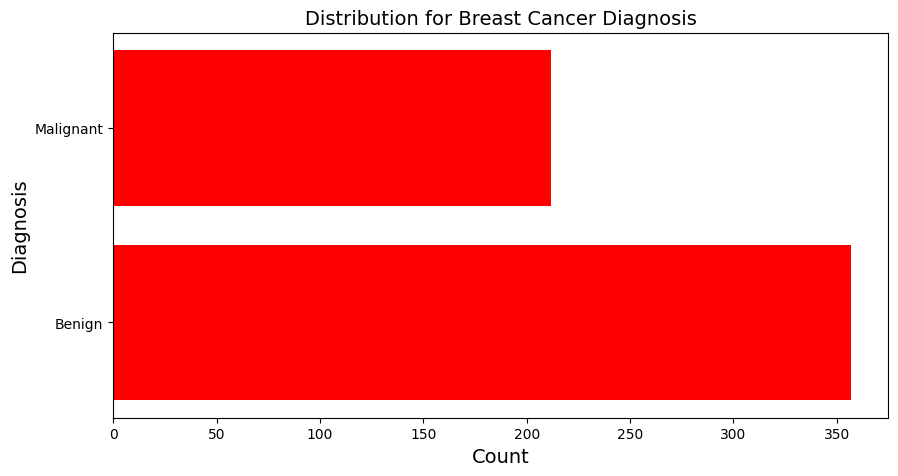

In [47]:
#Checking if diagnosis has only M and B (binary)
data['diagnosis'].value_counts()

#Plotting the distribution for Diagnosis
plt.figure(figsize=(10,5))
plt.barh(['Benign', 'Malignant'], data['diagnosis'].value_counts(), color ="#FF0000")
plt.title('Distribution for Breast Cancer Diagnosis', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Diagnosis", size =14)


The 'diagnosis' column holds binary data: 'M' for malignant (presence of cancer) and 'B' for benign (no cancer).

In [48]:
#function for converting M/B to Yes/No

def convert_diagnosis(x):
    if x == 'M':
        return "Yes"
    else:
        return "No"


Yes denotes Cancer Presence and No denotes Absence

In [49]:
#Converting diagnosis to a Yes/No field for our Analysis
data['diagnosis'] = data['diagnosis'].apply(convert_diagnosis)


In [50]:
#Reading first 5 rows after renaming the column diagnosis
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,Yes,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,Yes,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Observations:**
Now, the 'diagnosis' column contains categorical values 'Yes' (for malignant) and 'No' (for benign), simplifying analysis.

In [51]:
# Checking the data types of each column
data.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# What are the data types?

In [12]:
#Getting the list of categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [13]:
#Getting the list of numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

In [14]:
#Printing the list of categorical and numerical columns
print("<-------------------------------------------------------->")
print("                 Categorical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of categorical variables in our dataset: {len(categorical_cols)}')
for row,col in enumerate(categorical_cols):
    print(f'{row+1}. {col}')
print("\n")
print("<-------------------------------------------------------->")
print("                 Numerical Variables                  ")
print("<-------------------------------------------------------->")
print(f'Total number of numerical variables in our dataset: {len(numerical_cols)}')
for row,col in enumerate(numerical_cols):
    print(f'{row+1}. {col}')

<-------------------------------------------------------->
                 Categorical Variables                  
<-------------------------------------------------------->
Total number of categorical variables in our dataset: 1
1. diagnosis


<-------------------------------------------------------->
                 Numerical Variables                  
<-------------------------------------------------------->
Total number of numerical variables in our dataset: 31
1. id
2. radius_mean
3. texture_mean
4. perimeter_mean
5. area_mean
6. smoothness_mean
7. compactness_mean
8. concavity_mean
9. concave points_mean
10. symmetry_mean
11. fractal_dimension_mean
12. radius_se
13. texture_se
14. perimeter_se
15. area_se
16. smoothness_se
17. compactness_se
18. concavity_se
19. concave points_se
20. symmetry_se
21. fractal_dimension_se
22. radius_worst
23. texture_worst
24. perimeter_worst
25. area_worst
26. smoothness_worst
27. compactness_worst
28. concavity_worst
29. concave points_worst


# Are there missing values? # Which independent variable have missing data? How much?

In [15]:
#Checking missing values in our data
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### **Observations:**
We have 0% missing values both in our independent variables as well as dependent variable

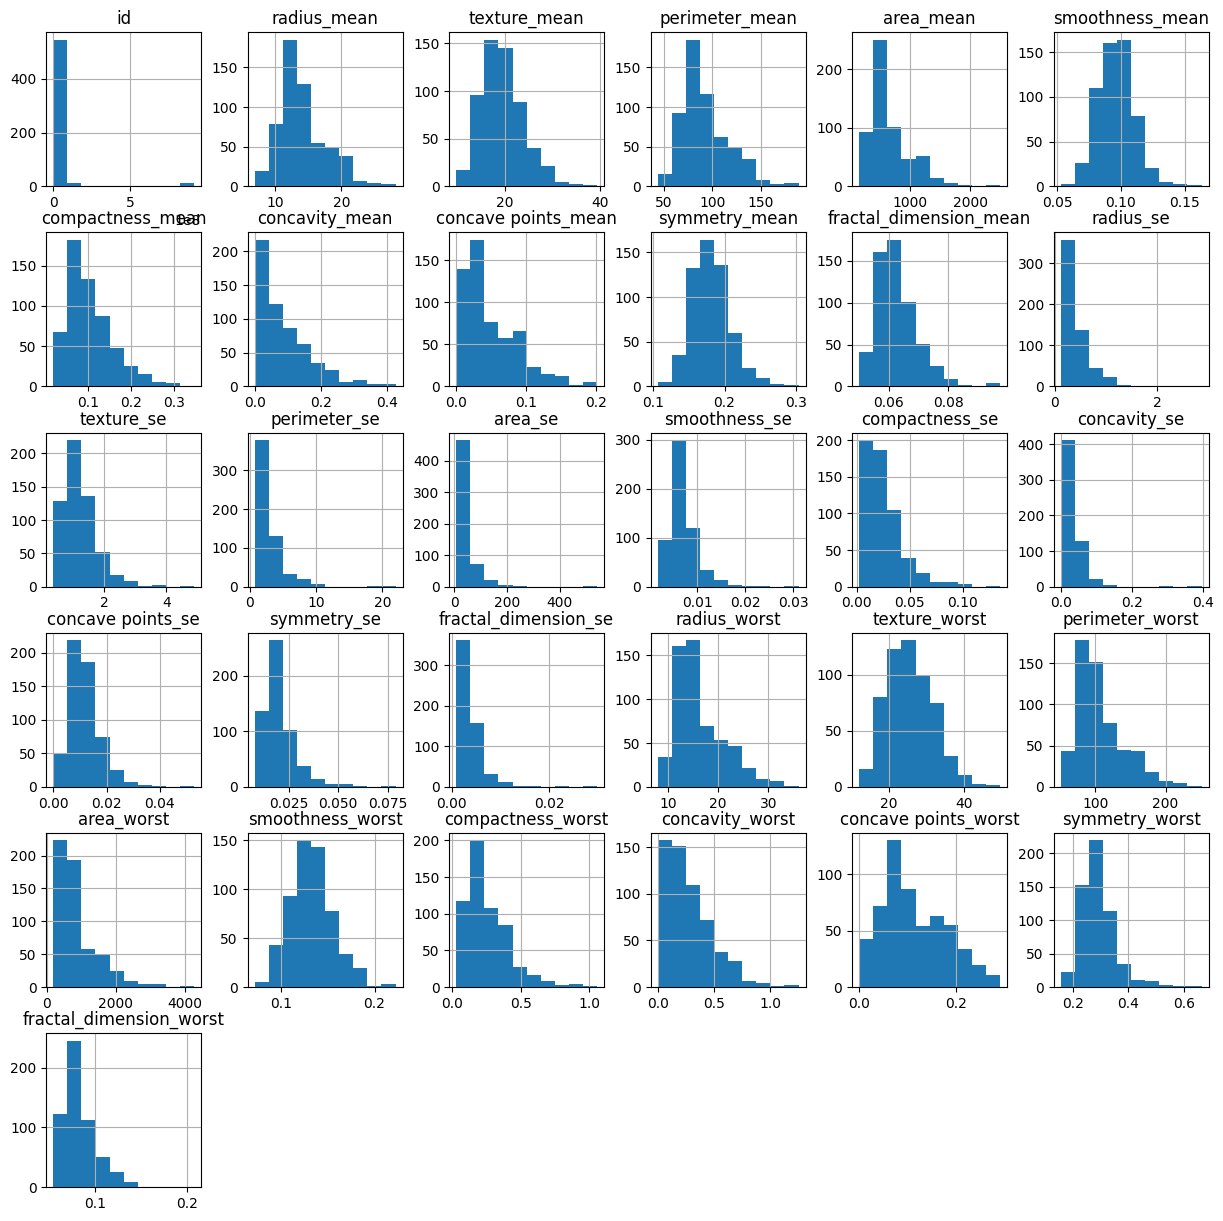

In [16]:
#generating histograms
plot = data.hist(figsize=(15,15))

Here I'm plotting histograms for each numerical column in the dataset. The hist() function in pandas is used to generate histograms for all numerical attributes in the breast cancer dataset

In [17]:
# Dropping the dependent variable from the dataframe to obtain the distributions of independent variables
datafinal = data.drop('diagnosis', axis=1)


## What are the distributions of the predictor variables?

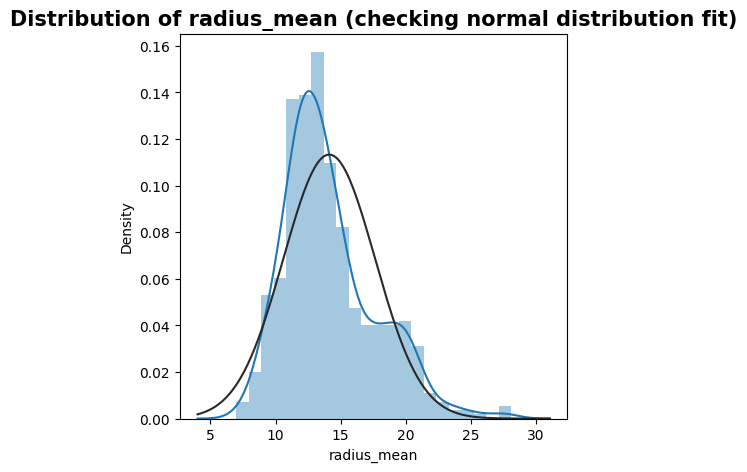

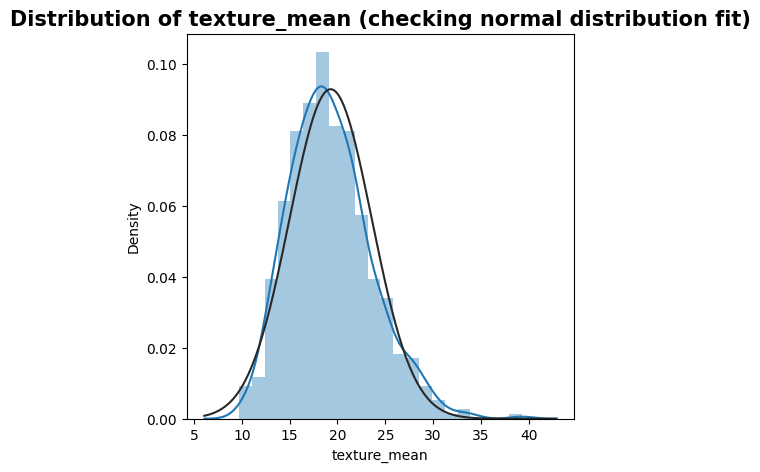

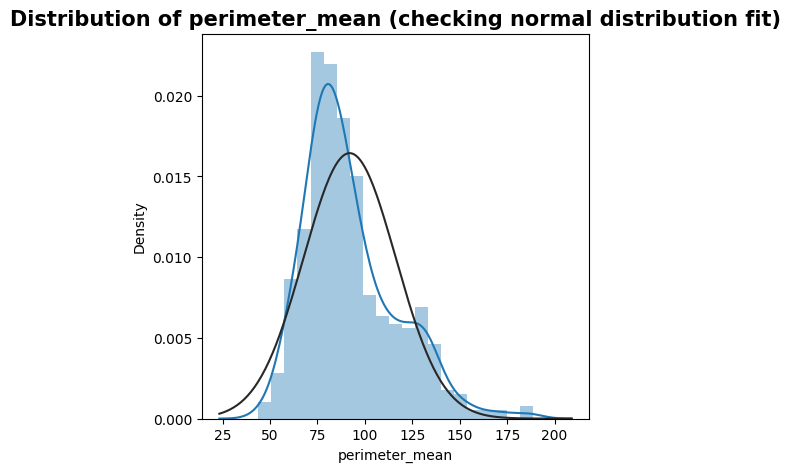

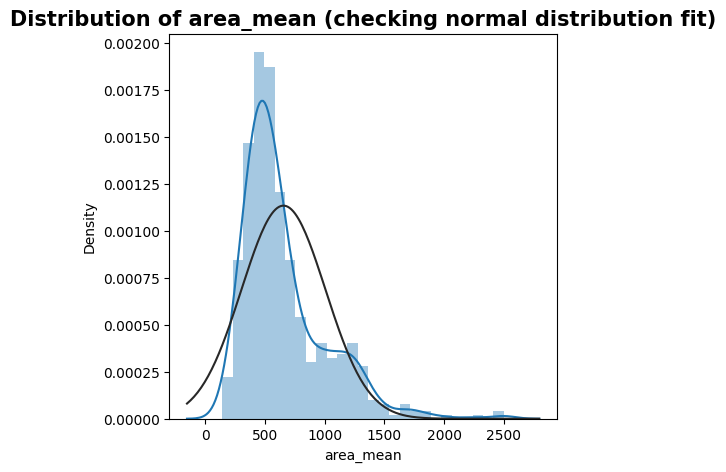

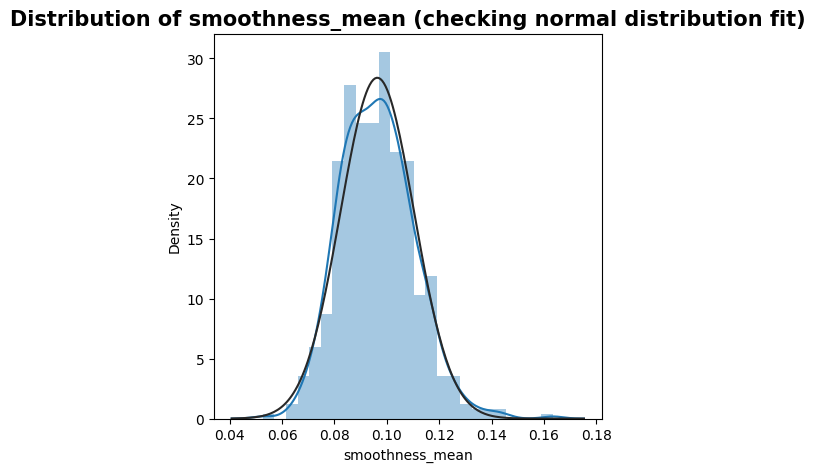

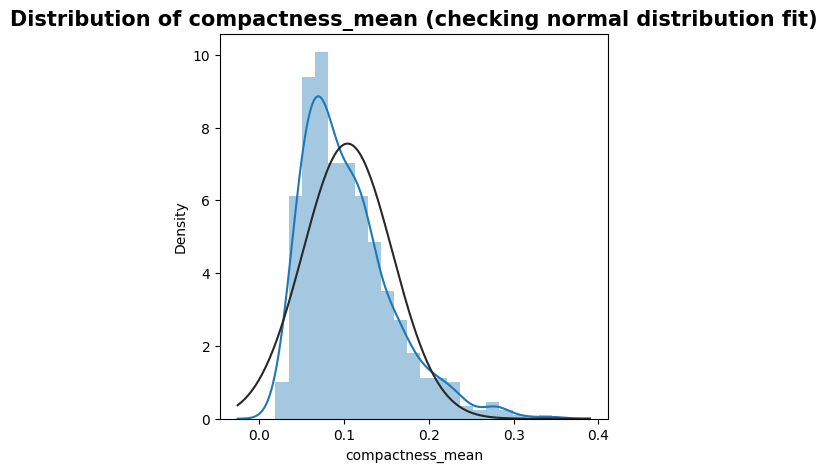

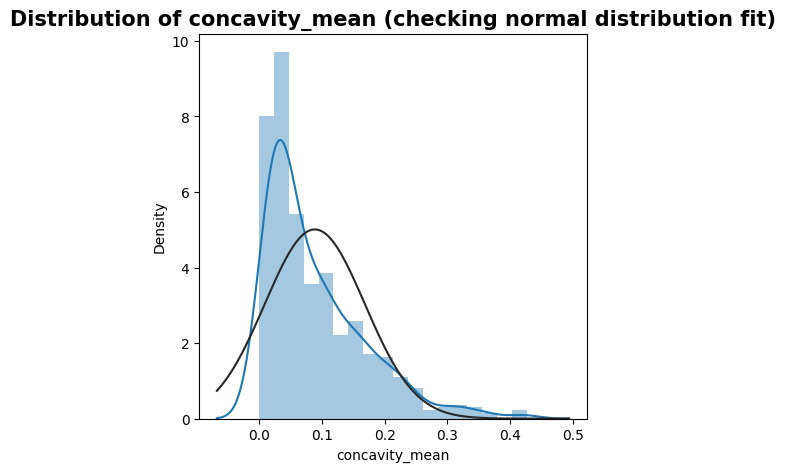

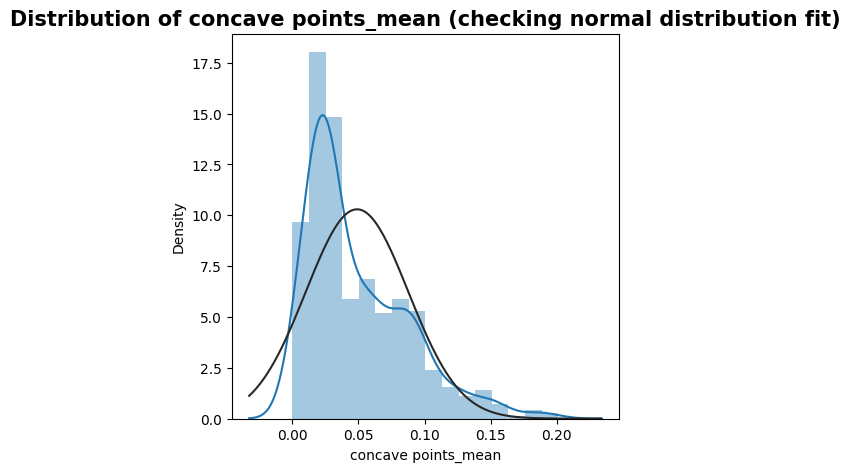

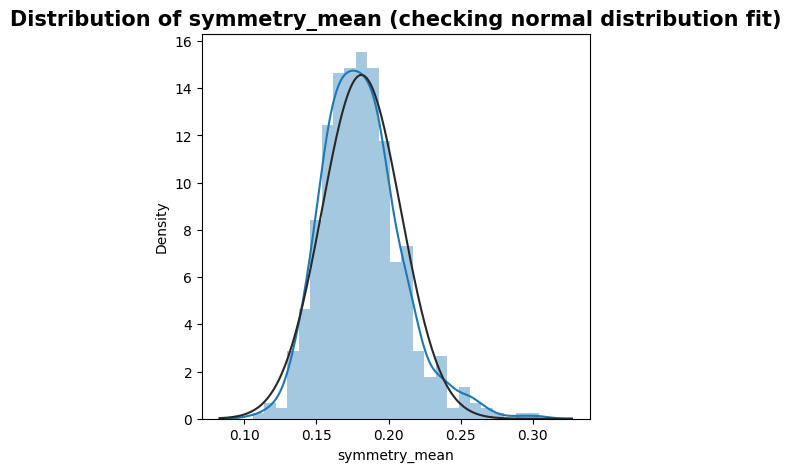

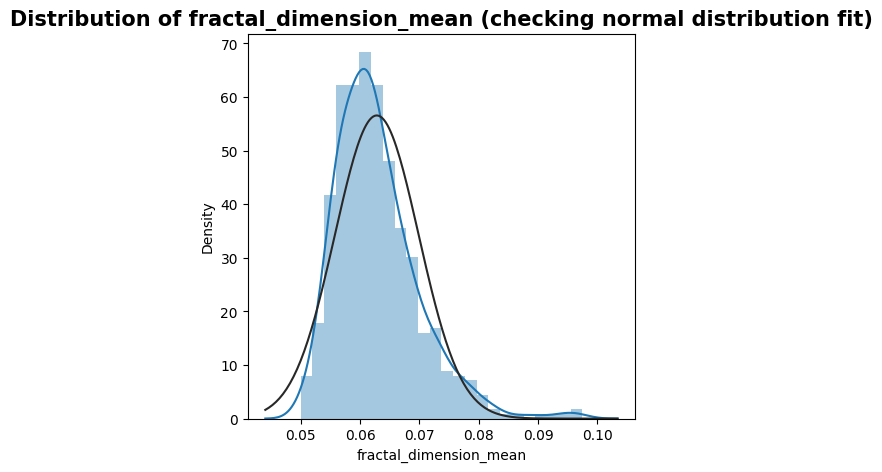

In [18]:
# Checking the distribution of independent(predictor) variables
datalist = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
            'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
            'fractal_dimension_mean']
for i in datalist:
    from scipy import stats
    plt.figure(figsize=(5,5))
    sns.distplot(data[i], fit=stats.norm)
    plt.title(f"Distribution of {i} (checking normal distribution fit)",
              size=15, weight="bold")


Observations from the graphs for the breast cancer dataset

1. radius_mean: normal distribution with a bit of right-skewness
2. texture_mean: normal distribution with a bit of right-skewness
3. perimeter_mean: normal distribution with a bit of right-skewness
4. area_mean: normal distribution with a bit of right-skewness
5. smoothness_mean: normal distribution
6. compactness_mean: normal distribution with right-skewness
7. concavity_mean: almost normal distribution
8. concave point_mean: almost normal distribution with right-skewness
9. symmetry_mean: normal distribution with a bit of right-skewness
10. fractal_dimension mean: normal distribution with a bit of right-skewness




# What are the likely distributions of the numeric variables?

The mean of 'radius_mean' is  14.13
The median of 'radius_mean' is  13.37
The Mode of 'radius_mean' is  0    12.34
Name: radius_mean, dtype: float64


Text(0.5, 1.0, 'Distribution curve for radius_mean')

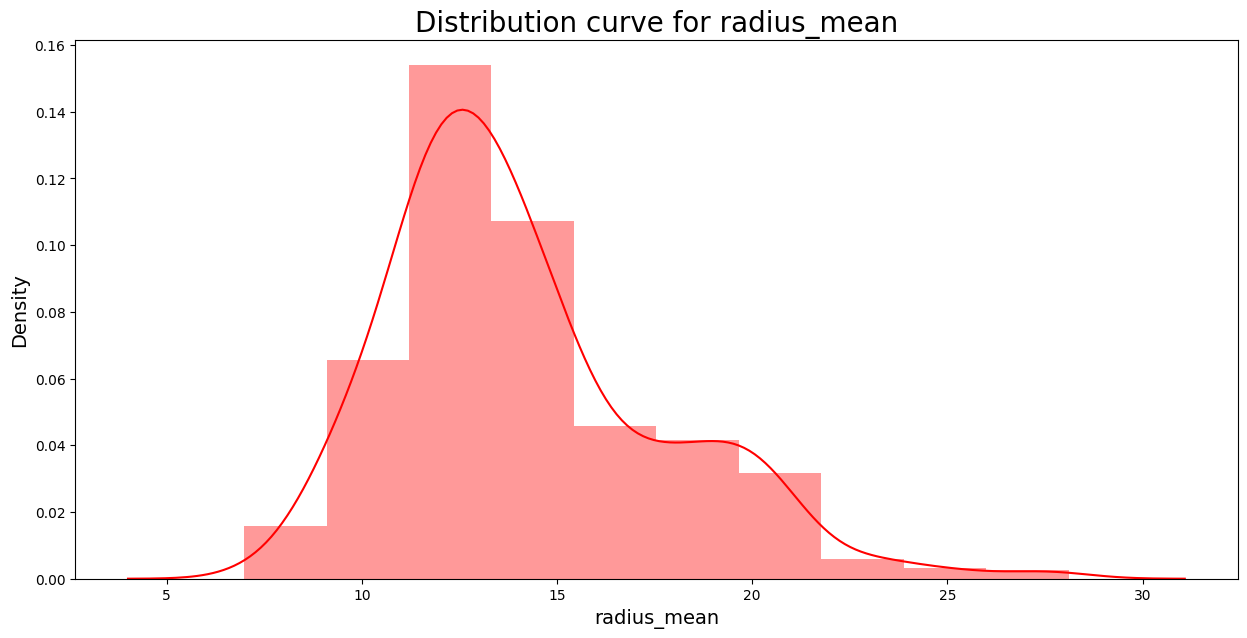

In [19]:
plt.figure(figsize=(15,7))
sns.distplot(data['radius_mean'], bins=10, color="red")
print("The mean of 'radius_mean' is ", round(data['radius_mean'].mean(), 2))
print("The median of 'radius_mean' is ", data['radius_mean'].median())
print("The Mode of 'radius_mean' is ", data['radius_mean'].mode())
plt.xlabel("radius_mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for radius_mean', size=20)


The mean and median are almost of similar value.

The density of radium with value approximately 12 is the highest.

The curve ascends from value 5 and descends around 30 and more.



The mean of texture_mean is  19.29
The median of texture_mean is  18.84
The Mode of texture_mean is  0    14.93
1    15.70
2    16.84
3    16.85
4    17.46
5    18.22
6    18.90
7    19.83
8    20.52
Name: texture_mean, dtype: float64


Text(0.5, 1.0, 'Distribution curve for texture_mean')

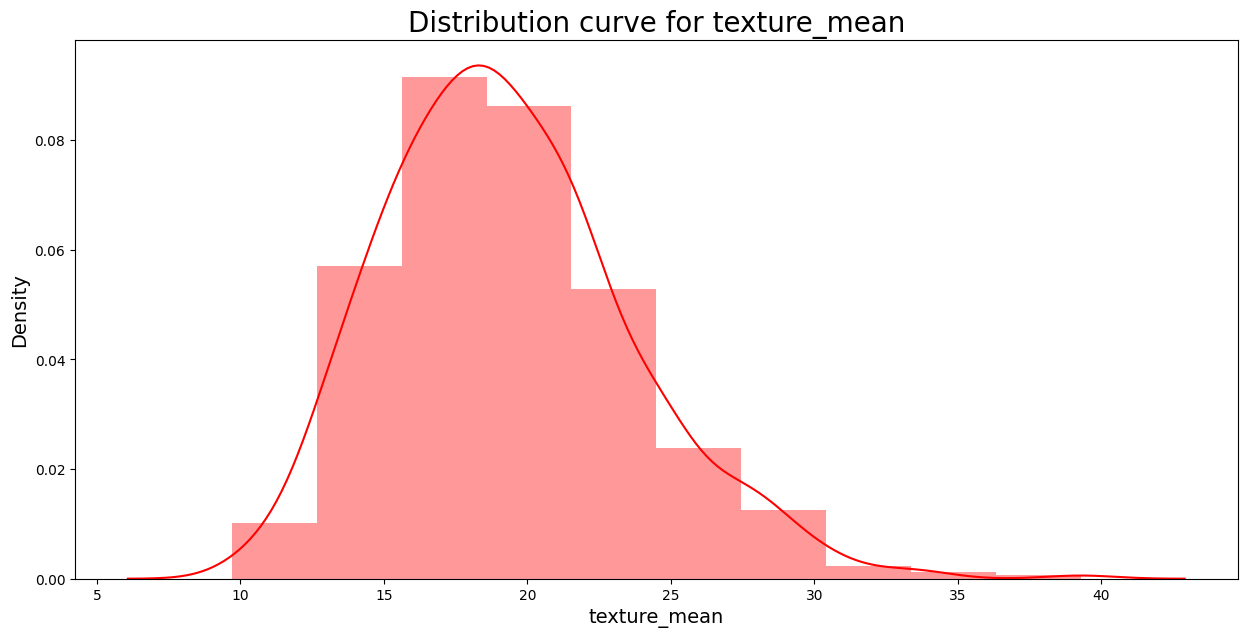

In [20]:
plt.figure(figsize=(15,7))
sns.distplot(data['texture_mean'], bins=10, color = "red")
print(f"The mean of texture_mean is ", round(data['texture_mean'].mean(),2))
print(f"The median of texture_mean is ", data['texture_mean'].median())
print(f"The Mode of texture_mean is ", data['texture_mean'].mode())
plt.xlabel("texture_mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for texture_mean', size=20)


The mean of area_mean is  654.89
The median of area_mean is  551.1
The Mode of area_mean is  0    512.2
Name: area_mean, dtype: float64


Text(0.5, 1.0, 'Distribution curve for Area Mean')

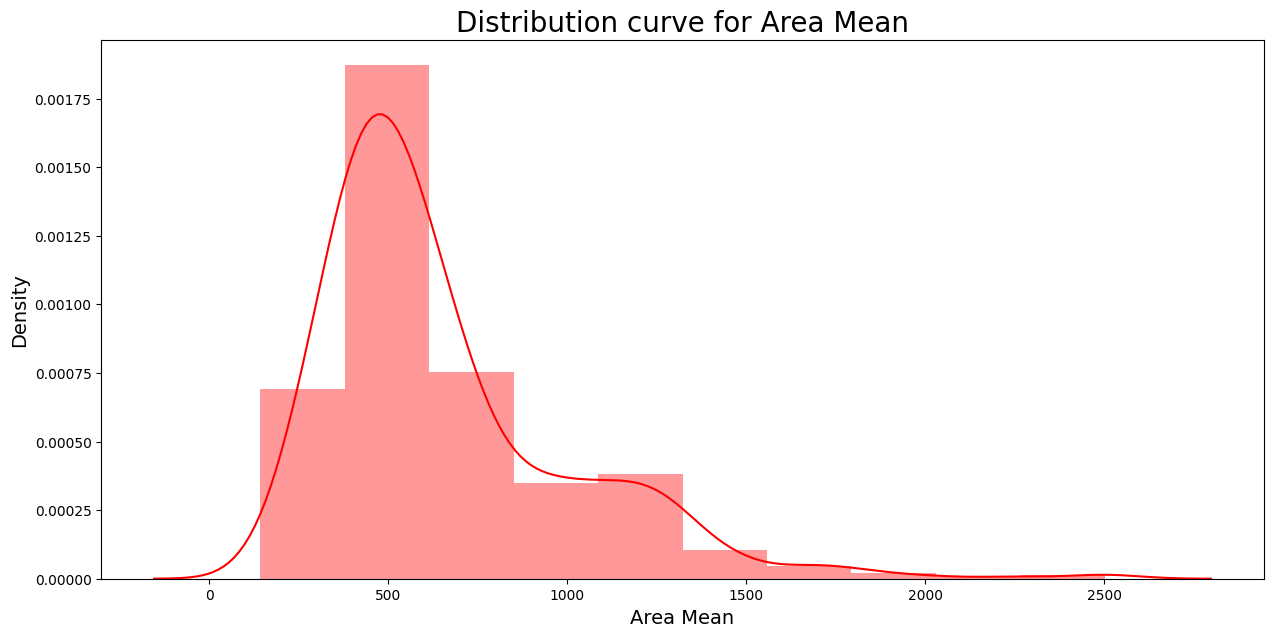

In [21]:
plt.figure(figsize=(15,7))
sns.distplot(data['area_mean'], bins=10, color="red")
print("The mean of area_mean is ", round(data['area_mean'].mean(), 2))
print("The median of area_mean is ", data['area_mean'].median())
print("The Mode of area_mean is ", data['area_mean'].mode())
plt.xlabel("Area Mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Area Mean', size=20)


The mean of 'perimeter_mean' is  91.97
The median of 'perimeter_mean' is  86.24
The Mode of 'perimeter_mean' is  82.61


Text(0.5, 1.0, 'Distribution curve for Perimeter Mean')

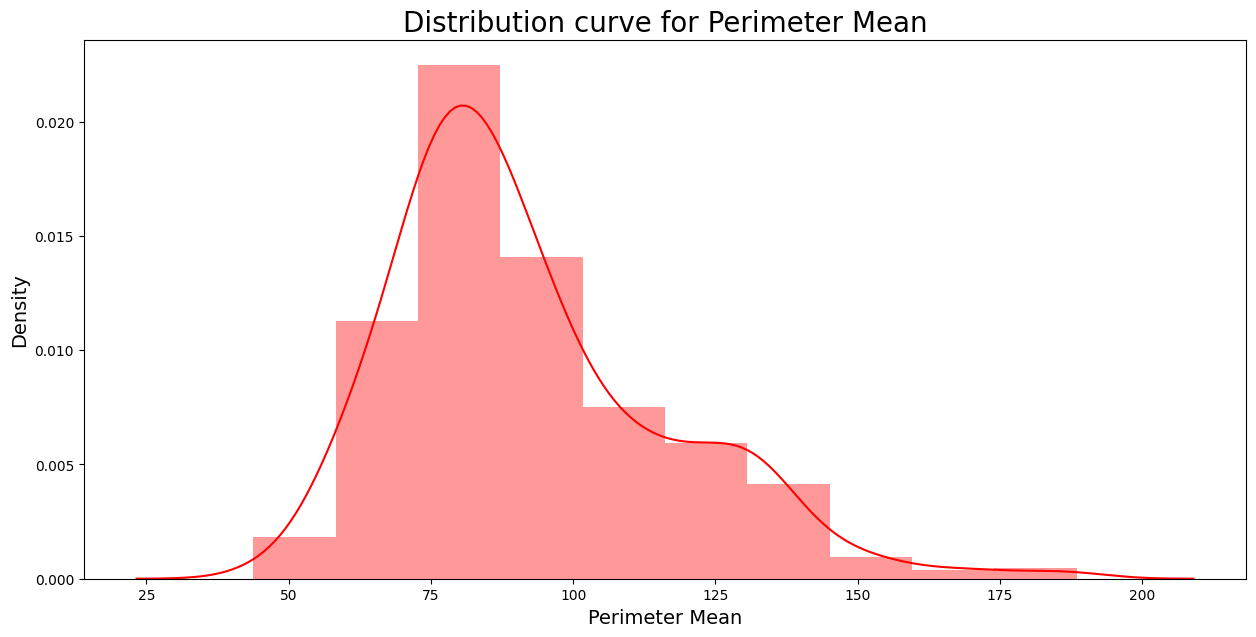

In [22]:
plt.figure(figsize=(15,7))
sns.distplot(data['perimeter_mean'], bins=10, color = "red")
print("The mean of 'perimeter_mean' is ", round(data['perimeter_mean'].mean(), 2))
print("The median of 'perimeter_mean' is ", data['perimeter_mean'].median())
print("The Mode of 'perimeter_mean' is ", data['perimeter_mean'].mode()[0])
plt.xlabel("Perimeter Mean", size=14)
plt.ylabel("Density", size=14)
plt.title('Distribution curve for Perimeter Mean', size=20)

Before we move further, we need to do some data cleaning for our analysis and also for building the model.

We will covert 'Yes/No' to 1/0 diagnosis

In [23]:
def convert_diagnosis_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0


In [24]:
data['diagnosis_binary'] = data['diagnosis'].apply(convert_diagnosis_to_binary)

#Do the range of the predictor variables make sense?

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

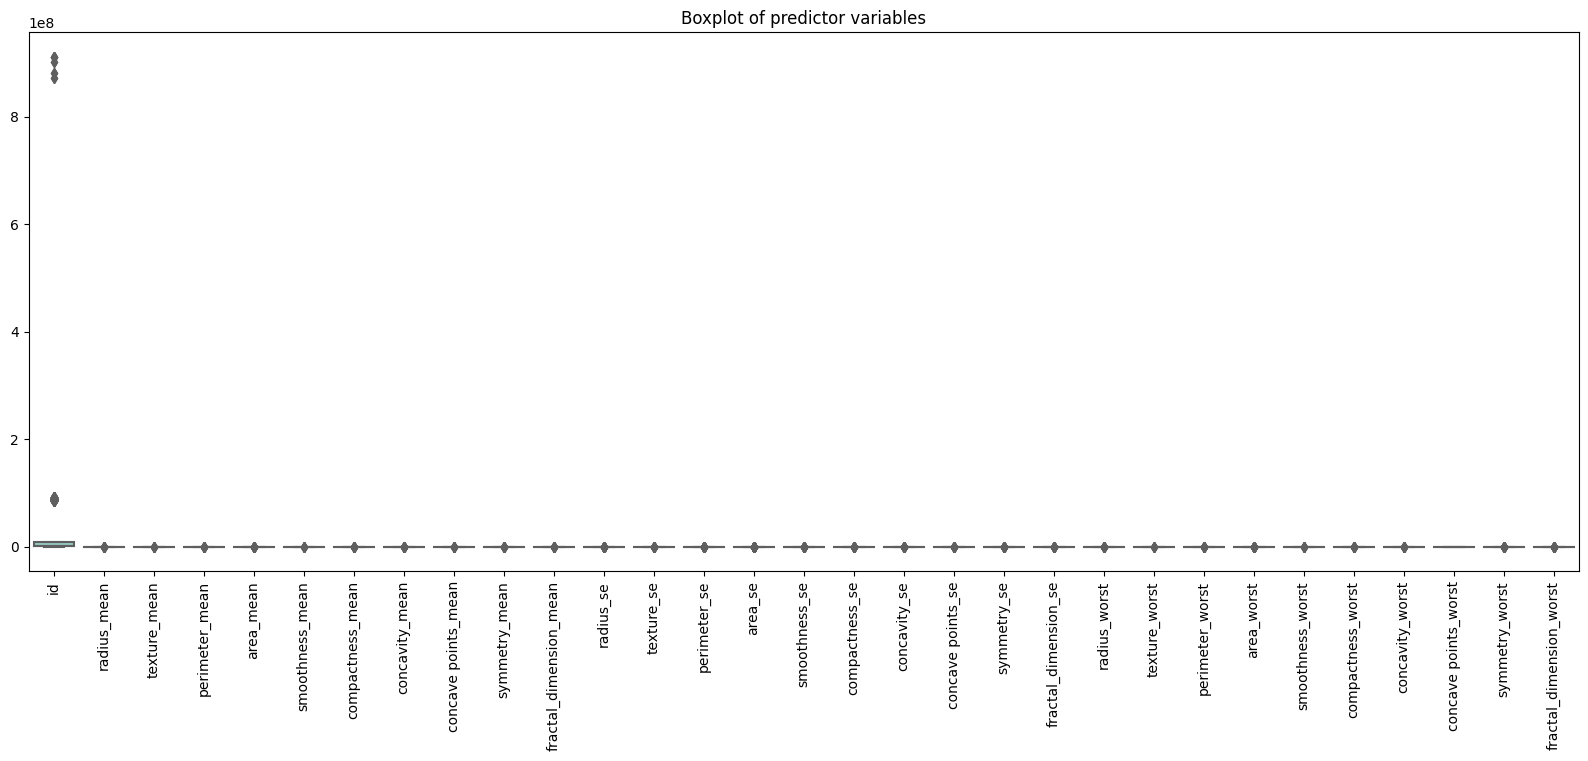

In [25]:
# Generate statistical summary for each numerical column
print(datafinal.describe())

# Plotting the boxplot for visual inspection
plt.figure(figsize=(20,7))
sns.boxplot(data=datafinal, palette="Set3")
plt.title('Boxplot of predictor variables')
plt.xticks(rotation=90)
plt.show()



1. Radius Mean (radius_mean):
The 'radius_mean' column ranges from approximately 6.981 to 28.11.
The distribution of values suggests a wide range of cell nucleus sizes, with some smaller and others larger.

2. Texture Mean (texture_mean):
The 'texture_mean' column ranges from approximately 9.71 to 39.28.

3. Perimeter Mean (perimeter_mean):
The 'perimeter_mean' column ranges from approximately 43.79 to 188.5.
The wide range of perimeters suggests differences in the overall shape and size of cell nuclei.

4. Area Mean (area_mean):
The 'area_mean' column ranges from approximately 143.5 to 2501.
The substantial variation in area values indicates differences in the size of cell nuclei, with some being significantly larger than others.

5. Smoothness Mean (smoothness_mean):
The 'smoothness_mean' column shows values ranging within a smaller range.
The relatively lower standard deviation suggests that the smoothness values are less dispersed and relatively consistent among observations.

6. Compactness Mean (compactness_mean):
The 'compactness_mean' column has a wider range of values.
The distribution of values suggests variations in how tightly packed cell nuclei are, with some being more compact and others less so.

7. Concavity Mean (concavity_mean):
The 'concavity_mean' column ranges from 0 to higher values.
The presence of values close to zero indicates that some cell nuclei exhibit little to no concavity, while others have more concave shapes.

8. Concave Points Mean (concave points_mean):
The 'concave points_mean' column ranges from 0 to higher values.
The variation in values suggests differences in the number of concave points among cell nuclei.

9. Symmetry Mean (symmetry_mean):
The 'symmetry_mean' column shows values ranging within a smaller range.
The relatively lower standard deviation suggests that symmetry values are less dispersed and relatively consistent among observations.

10. Fractal Dimension Mean (fractal_dimension_mean):
The 'fractal_dimension_mean' column ranges within a smaller range.
The values suggest a relatively consistent fractal dimension.

11. Diagnosis Binary (diagnosis_binary):
The 'diagnosis_binary' column appears to contain constant values with a standard deviation of 0.
This shows that'diagnosis_binary' column may not provide much variability and might not be suitable as a predictor variable.

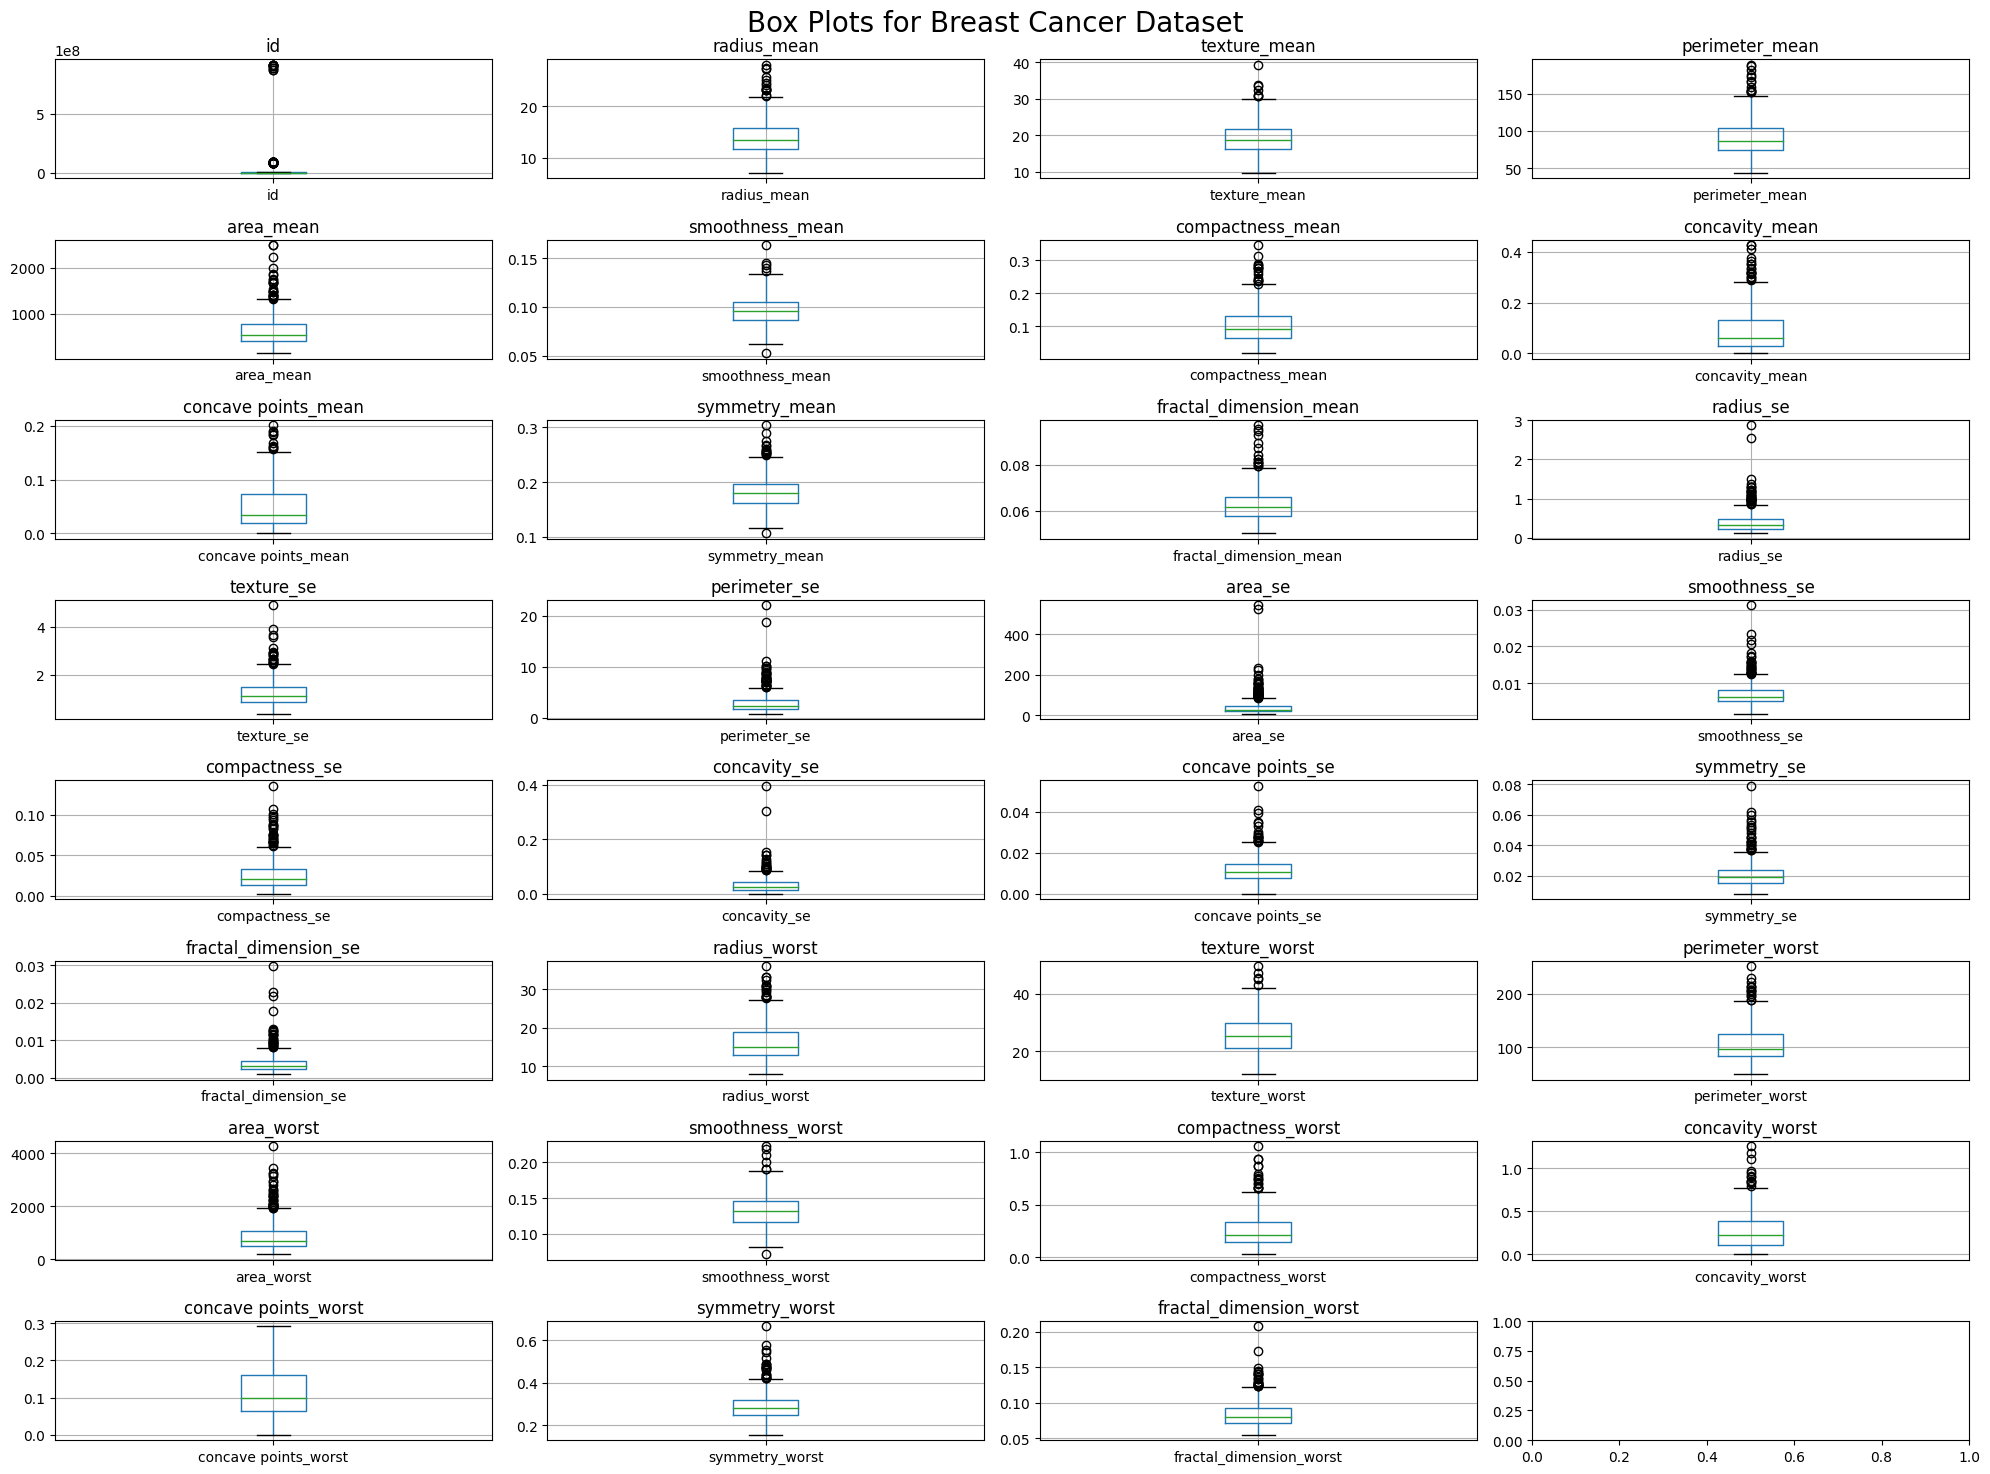

In [26]:
import matplotlib.pyplot as plt

# Create individual box plots for each numeric variable
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 15))
fig.suptitle('Box Plots for Breast Cancer Dataset', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    if i < len(datafinal.columns):
        datafinal.boxplot(column=datafinal.columns[i], ax=ax)
        ax.set_title(datafinal.columns[i])

plt.tight_layout()
plt.show()


## Observations
The breast cancer dataset contains numerical variables with varying ranges, making it difficult to visualize and analyze effectively.

To address this issue and prepare the data for modeling, normalization is chosen as the scaling technique.

In [33]:
from sklearn import preprocessing
import pandas as pd

# Assuming 'data' is your breast cancer dataset, and you want to normalize specific columns
columns_to_normalize = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
    'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

# Create x to store scaled values as floats
x = data[columns_to_normalize].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Replace the original columns with normalized values in the DataFrame
data[columns_to_normalize] = pd.DataFrame(x_scaled)



In [34]:
#data after noromalizing and feature creation
data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_binary
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.372583
std,1.250206e+08,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,8.670000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.692180e+05,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,9.060240e+05,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,0.000000
75%,8.813129e+06,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,9.113205e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
We can see that the numerical variables - Bradius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst' are now in the range of 0 to 1

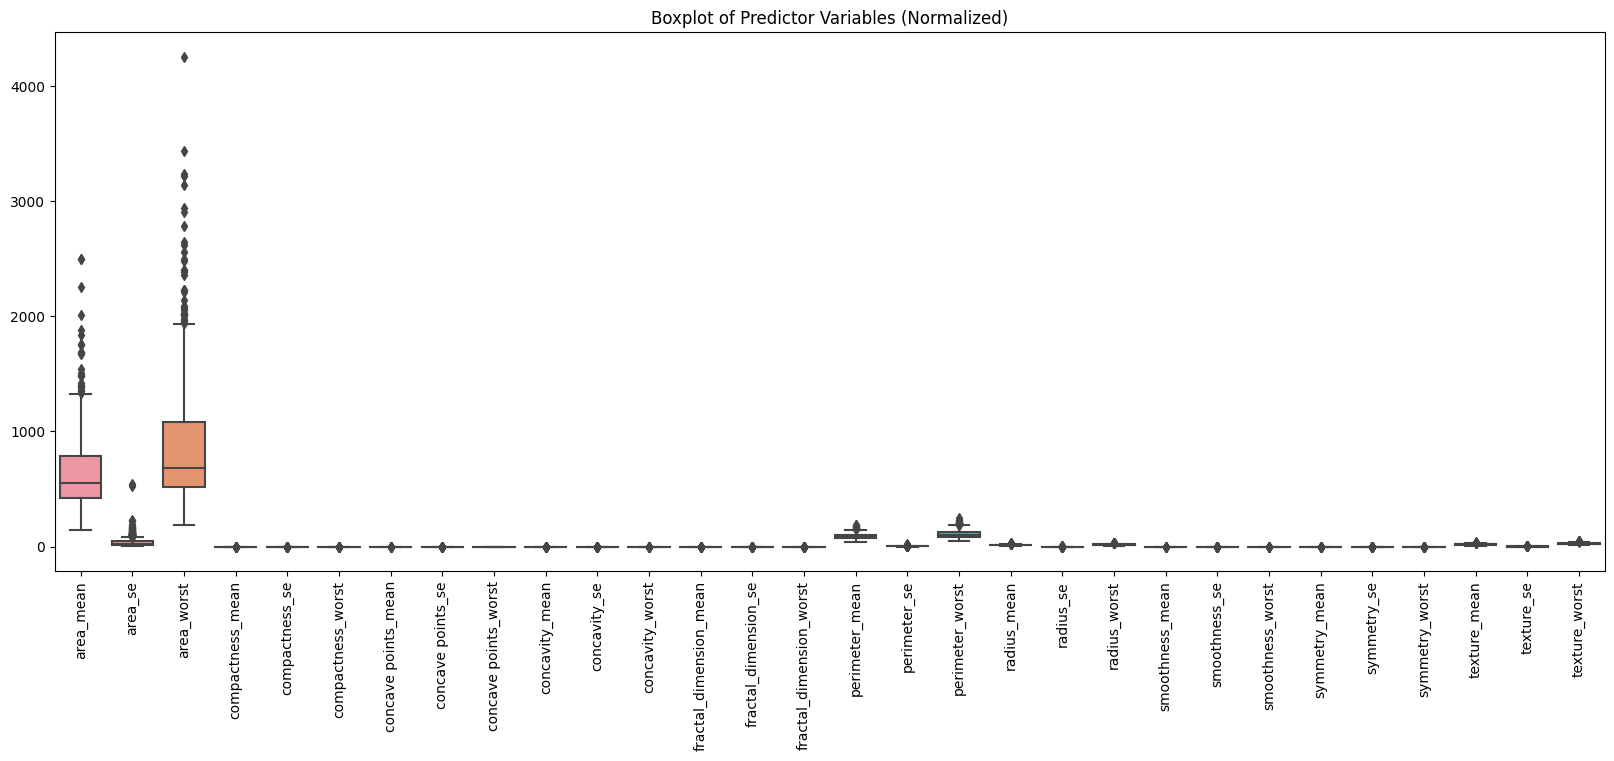

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(20, 7))

# Assuming 'datafinal' is your breast cancer dataset
# Exclude the 'id' column (if you don't want to plot it)
columns_to_plot = datafinal.columns.difference(['id'])

# Create a boxplot for the remaining columns
sns.boxplot(data=datafinal[columns_to_plot])

# Set the plot title
plt.title("Boxplot of Predictor Variables (Normalized)")

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()


It shows a clear visualization

## Are the predictor variables independent of all other predictor variables?

In [30]:
#checking the correlation between all the features in the data
datafinal.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


## Conclusion
At first glance we can see that that the variables have very less collinearity.

To visualize the values lets check the heatmap next

<Axes: >

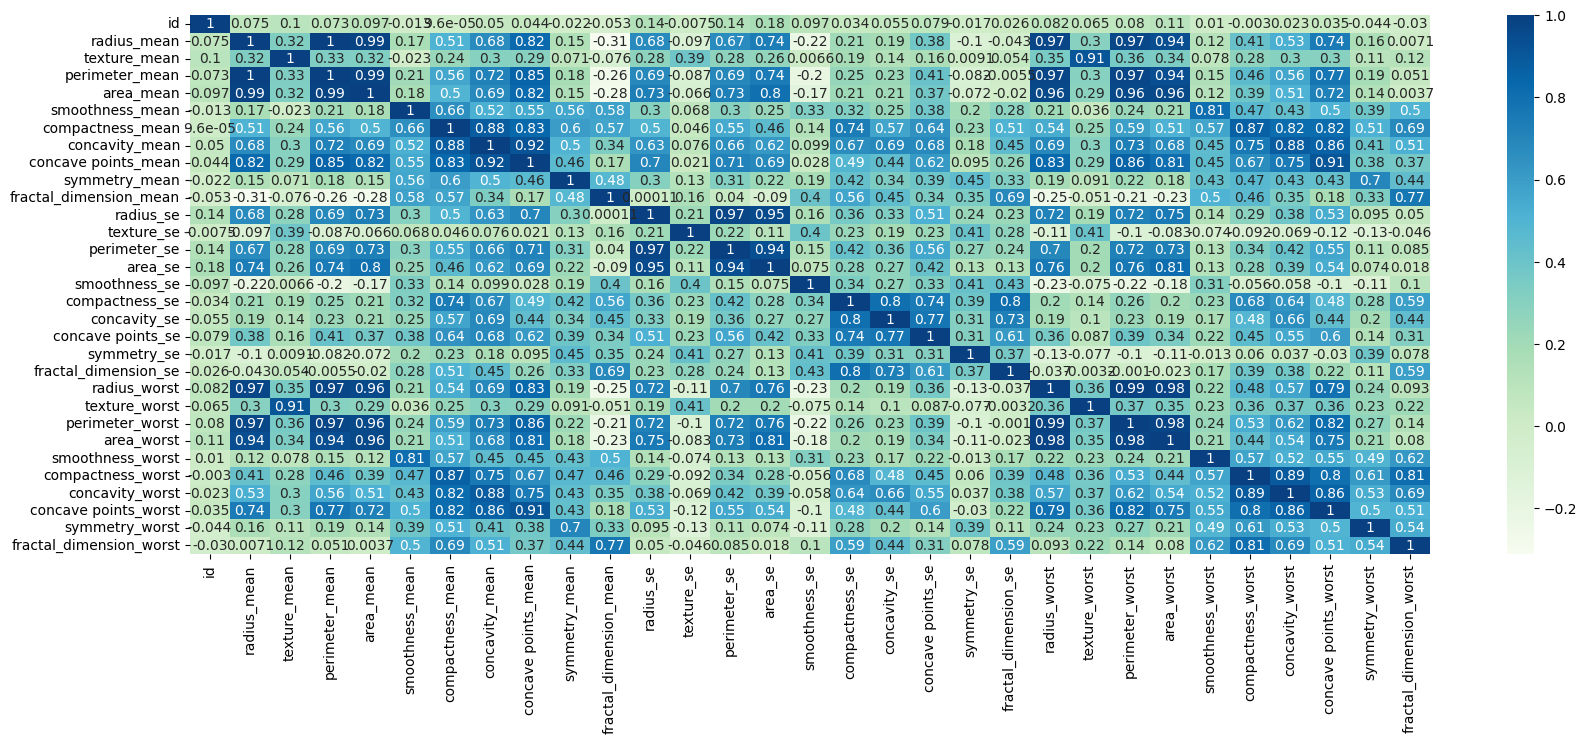

In [31]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(datafinal.corr(), annot=True, cmap='GnBu')

# Observations

1.
From the plots, we do not have much high correlation between features.
2. Perimeter_se and Radius_se have 0.97 correlation value.
3. Also Radius_mean and Perimeter_mean have 0.97 correlation value.


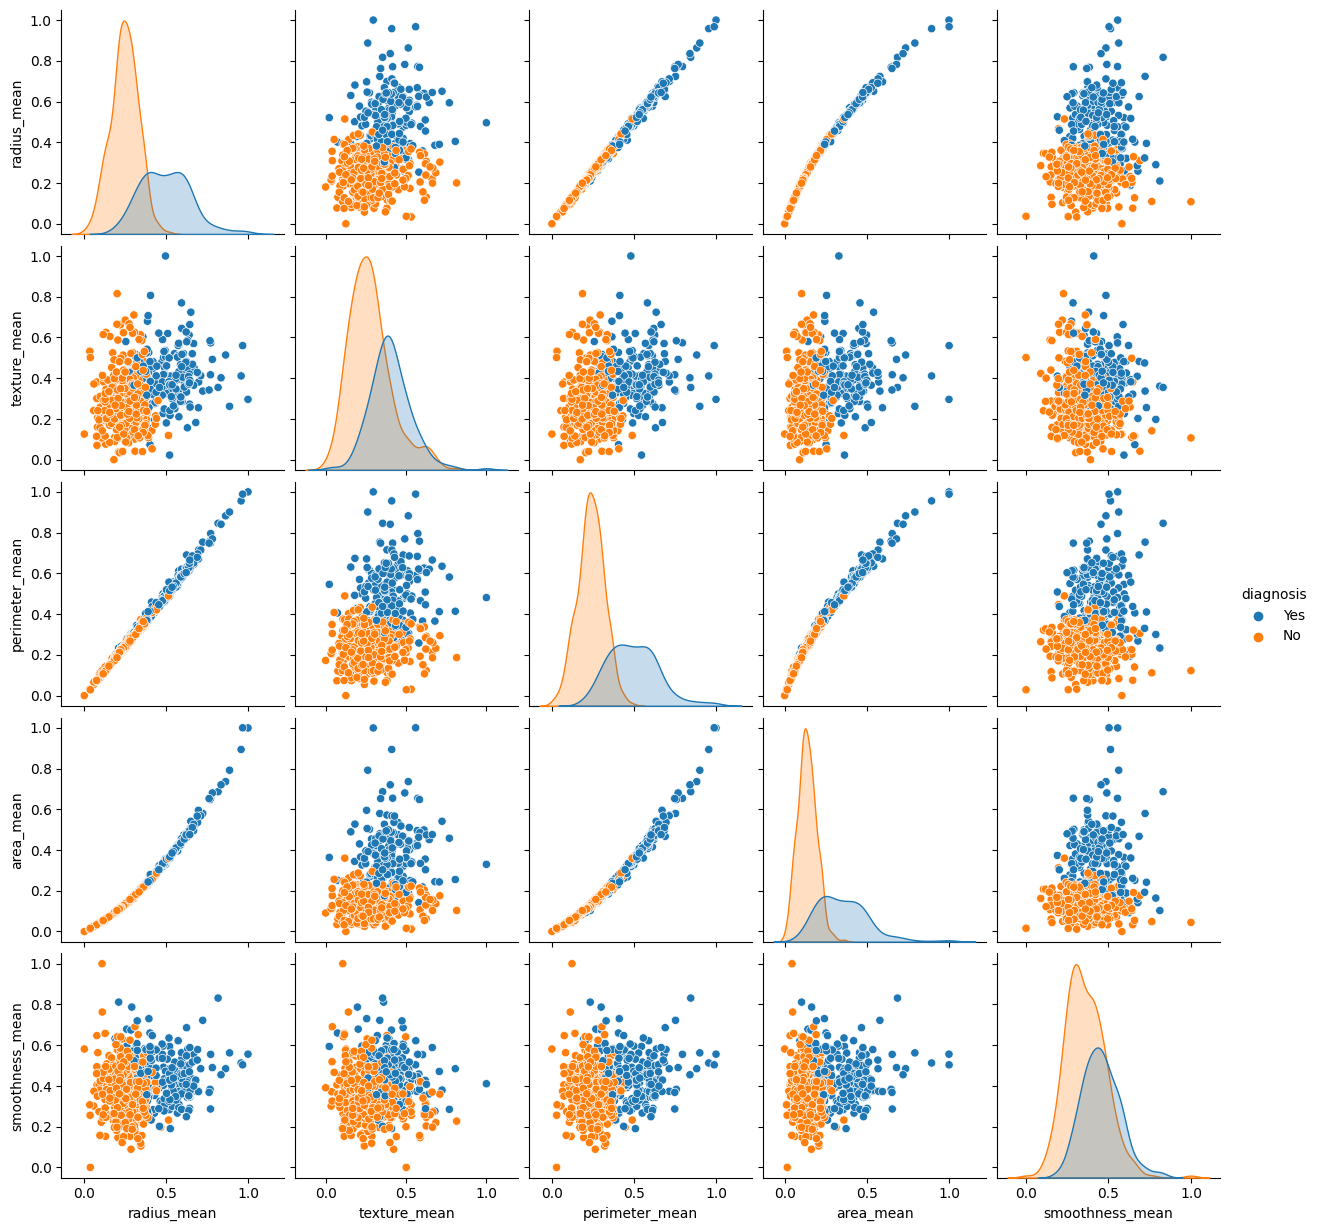

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#pair plot to check the colinearity
selected_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data[selected_columns], hue='diagnosis')
plt.show()


## Which independent variables are useful to predict a target (dependent variable)?


### Method 1: Using OLS for finding the p value to check the significant features

In [63]:

diagnosis_mapping = {'Yes': 1.0, 'No': 0.0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_mapping)


In [65]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variables
data['intercept'] = 1

independent_vars = ['intercept', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

model = sm.OLS(data['diagnosis'], data[independent_vars]).fit()

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     120.1
Date:                Tue, 03 Oct 2023   Prob (F-statistic):          4.40e-132
Time:                        00:23:51   Log-Likelihood:                -67.236
No. Observations:                 569   AIC:                             156.5
Df Residuals:                     558   BIC:                             204.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -2.0521      0.417     -4.925      0.000      -2.870      -1.234
radius_mean                0.4900      0.131      3.734      0.000       0.232       0.748
texture_mean               0.0220      0.003      7.518      0.000       0.016       0.028
perimeter_mean            -0.0550      0.021     -2.618      0.009      -0.096      -0.014
area_mean                 -0.0010      0.000     -3.881      0.000      -0.001      -0.000
smoothness_mean            1.9409      1.411      1.376      0.169      -0.830       4.712
compactness_mean           0.0973      1.039      0.094      0.925      -1.944       2.138
concavity_mean             0.8098      0.495      1.635      0.103      -0.163       1.783
concave points_mean        6.4310      1.386      4.641      0.000       3.709       9.153
symmetry_mean              1.0119      0.561      1.803      0.072      -0.091       2.114
fractal_dimension_mean    -0.1193      4.158     -0.029      0.977      -8.286       8.048
==============================================================================
Omnibus:                       13.881   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.538
Skew:                           0.384   Prob(JB):                     0.000697
Kurtosis:                       2.843   Cond. No.                     2.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will consider a significance value of 0.05 for determining the significance of our predictor variables which means if

p value is greater that 0.05 - feature is not significant for predicting the target variable p value is less than 0.05 - feature is significant for predicting the target variable

## **Observations:**

1. radius_mean:
Has a p-value of 0.000 which is lesser than 0.05, implying it is a significant feature for predicting diagnosis.
2. texture_mean:
Has a p-value of 0.000 which is lesser than 0.05, indicating its significance in the model.
3. perimeter_mean:
P-value stands at 0.009, which is less than 0.05, making it a significant predictor.
4. area_mean:
With a p-value of 0.000, this predictor is statistically significant.
5. smoothness_mean:
Has a p-value of 0.169, which is greater than 0.05, making it an insignificant feature for predicting the outcome.
6. compactness_mean:
With a high p-value of 0.925, it's considered not significant in this regression model.
7. concavity_mean:
Holds a p-value of 0.103. Since it's more than 0.05, it's not a significant predictor.
8. concave points_mean:
With a p-value of 0.000, it is a significantly influential feature.
9. symmetry_mean:
Has a p-value of 0.072. Although it's close to the 0.05 threshold, it's still above it, rendering it as not significant.
10. fractal_dimension_mean:
Its p-value is 0.977, making it a non-significant predictor in the model.

From the above observations, the predictors radius_mean, texture_mean, perimeter_mean, area_mean, and concave points_mean stand out as the most significant in determining the diagnosis, while the others either do not play a significant role or have marginal influence.

## Method 2 :Calculating Z Score



In [66]:
import pandas as pd

def calculate_z_scores(df):
    return (df - df.mean()) / df.std()

# Assuming 'data' already contains the Breast Cancer dataset
columns_to_select = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df = data[columns_to_select].apply(pd.to_numeric, errors='coerce')

z_scores = calculate_z_scores(df)
print(z_scores)


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     compactness_mean  concavity_mean  concave points_mean  sym

**A z-score greater than 3 or less than -3 is generally considered to be an outlier. This is because a z-score of 3 or greater (or less than -3) corresponds to a data point that is more than 3 standard deviations away from the mean.**

1. radius_mean: The first entry (0 index) has a z-score of 1.096100, which means it is approximately 1.096 standard deviations above the mean for radius_mean. The fifth entry (4 index) has a z-score of 1.748758, suggesting it's about 1.749 standard deviations above the mean. Most of the values in this column seem to be within the range [-3, 3], which indicates there are likely no outliers
2. smoothness_mean: The third entry (2 index) has a z-score of 0.941382, which means it's closer to the mean. However, the fourth entry (3 index) has a z-score of 3.280667, indicating that this data point is just over 3 standard deviations above the mean and could be considered an outlier.
3. compactness_mean: The first entry (0 index) has a z-score of 3.280628, which is slightly over 3. This suggests that this data point could be an outlier. Similarly, the fourth entry (3 index) with a z-score of 3.399917 is also likely an outlier.

4. fractal_dimension_mean: The third entry (2 index) has a z-score of -0.397658, which is less than half a standard deviation below the mean. The fourth entry (3 index), with a z-score of 4.906602, stands out significantly. This value is almost 5 standard deviations above the mean and is h**ighly likely to be an outlier**.

5. For other columns, while some values are close to 3 or slightly over, they may be considered borderline outliers.

Many of the z-scores are close to zero, suggesting that many data points are close to the mean.

# Do the training and test sets have the same data?

## Building the Model
Train ,Validation and Test split

In [67]:
from sklearn.model_selection import train_test_split

# Selecting the independent variables
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Dependent variable (target) is 'diagnosis'
y = data['diagnosis']

# Splitting data into Training 76.5%, Validation set 13.5%, and Test set 10%
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


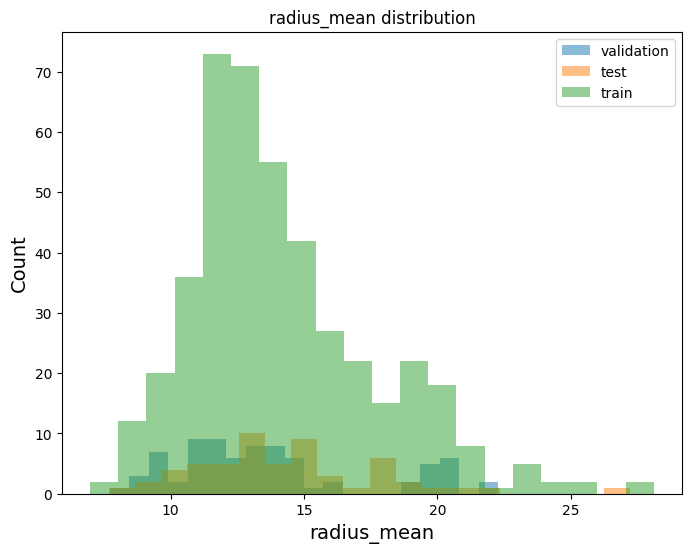

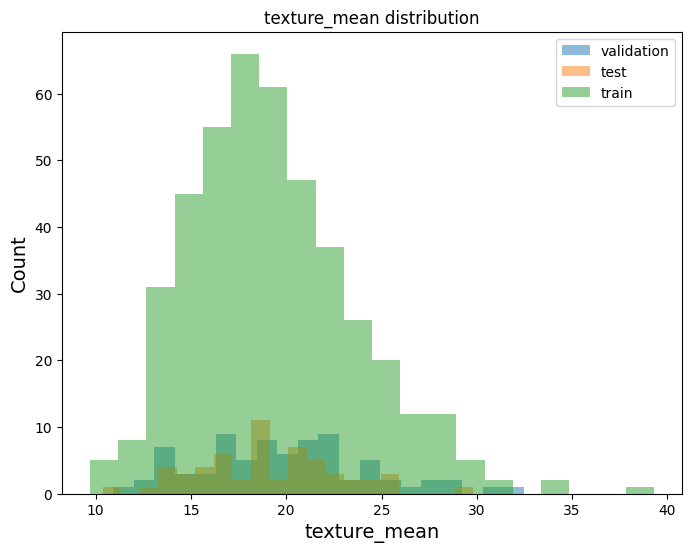

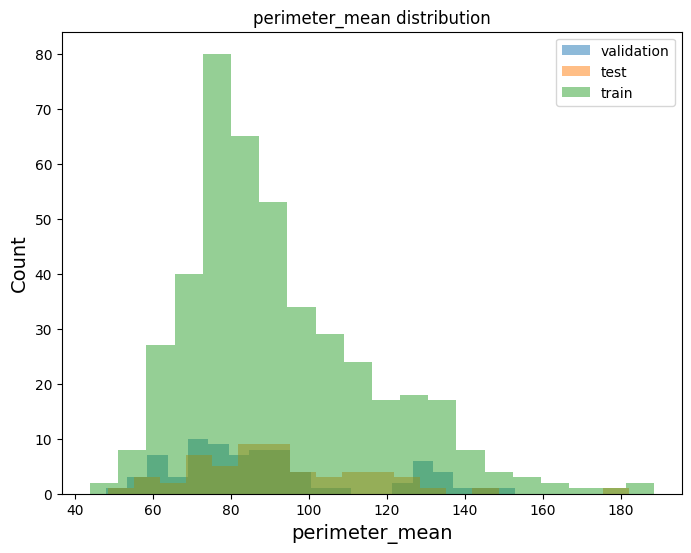

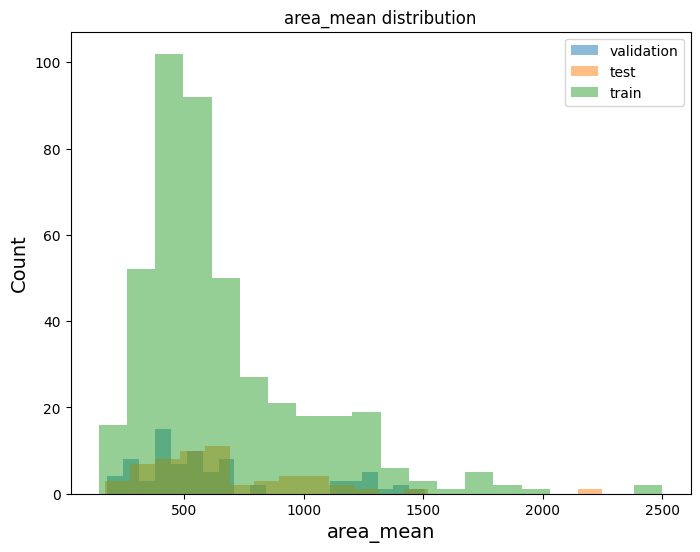

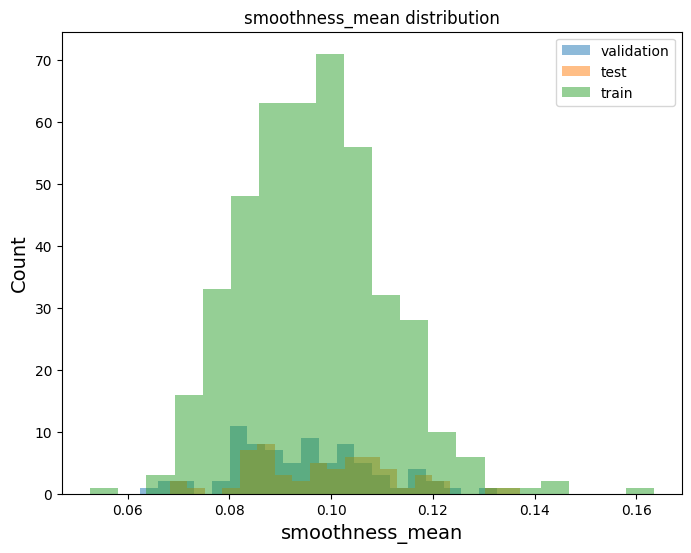

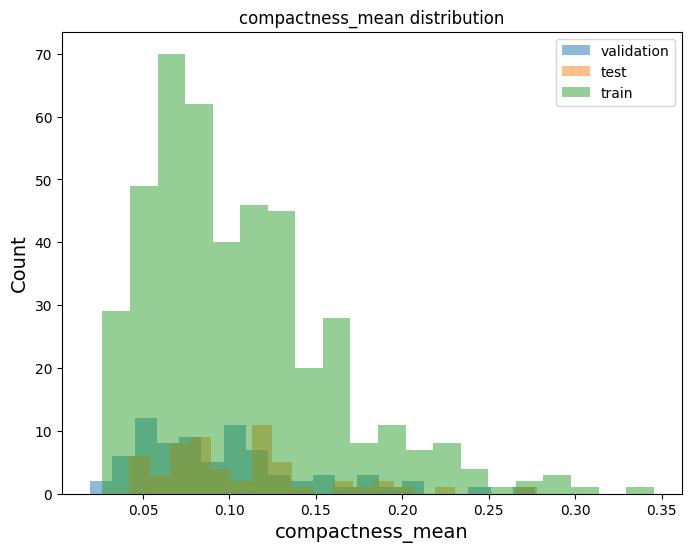

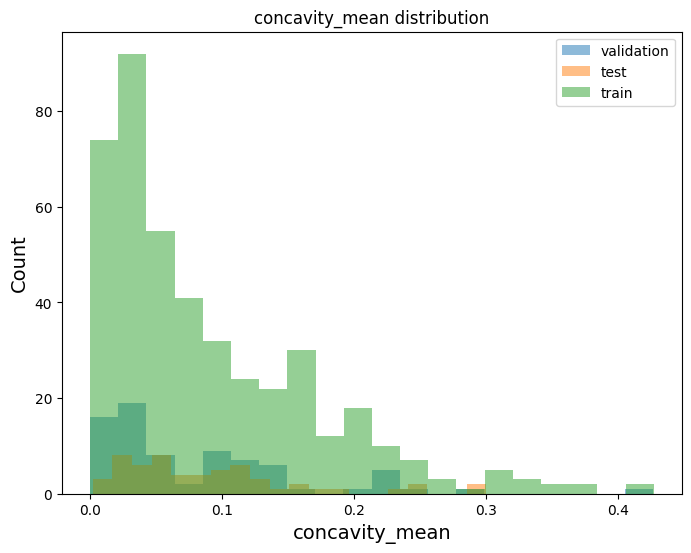

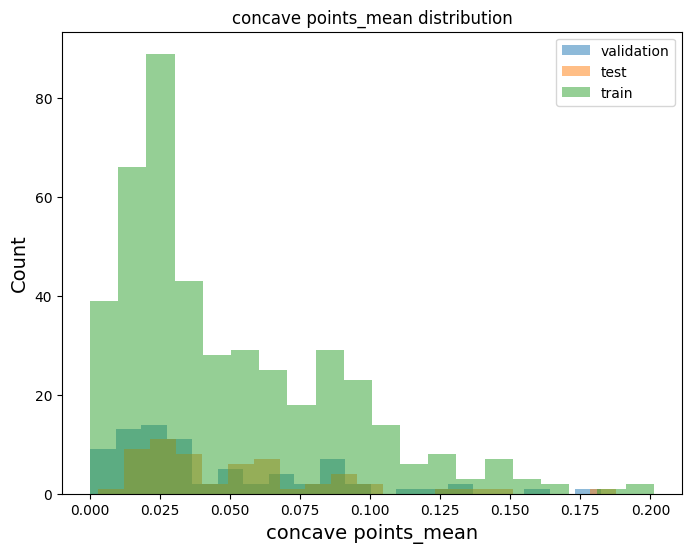

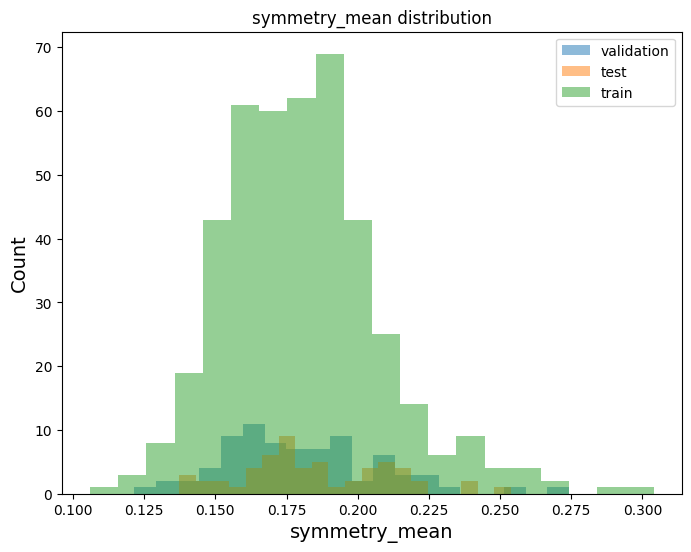

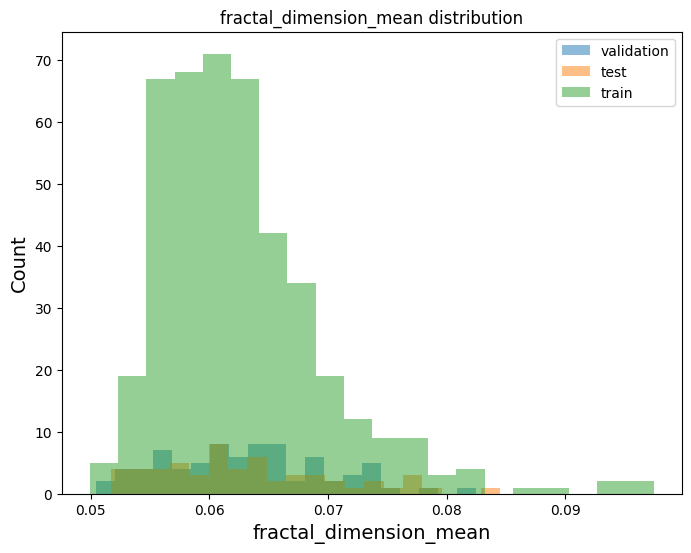

In [68]:
import matplotlib.pyplot as plt

# Selecting the independent variables
X_test_plot = X_test[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X_val_plot = X_val[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X_train_plot = X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8,6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()


## Observations:

The division of dataset in Test, train and validation sets appears to be distributed correctly for all the variables except for texture_mean, area_mean, concavity_mean distribution, concave_points_mean distribution, fractal_dimension_mean distribution

## Method 3 - Using Gradient Boosting Classifier Results



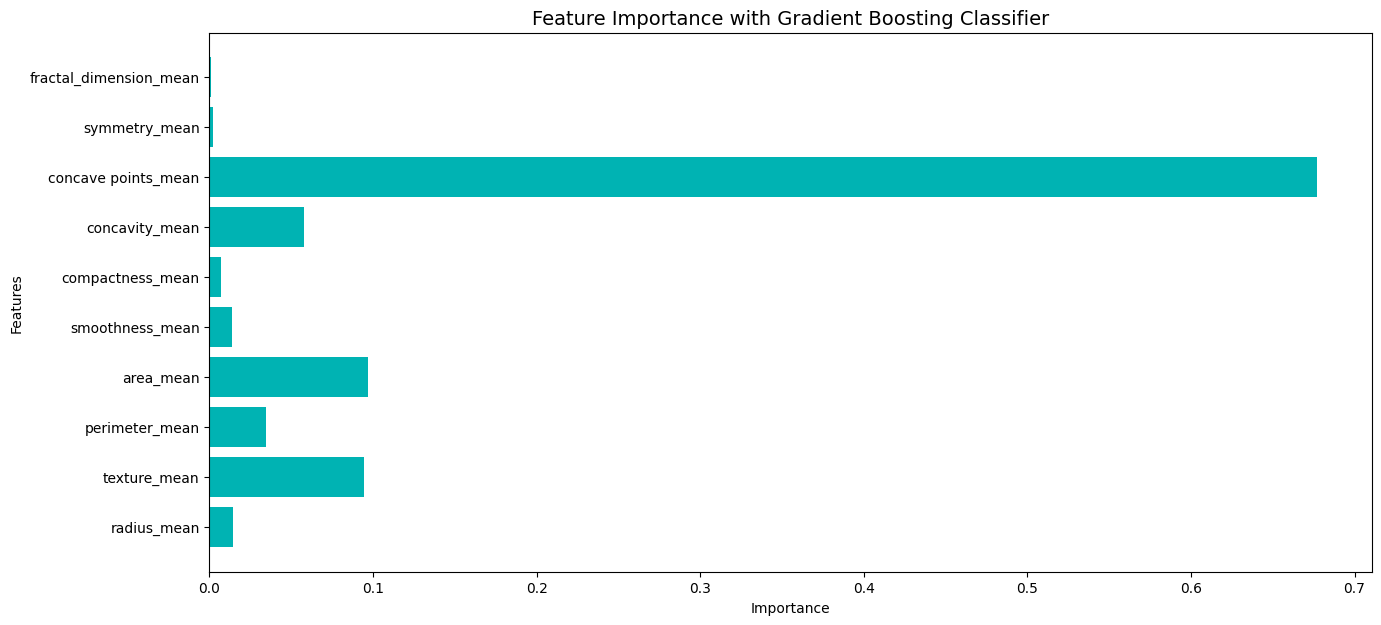

In [70]:
from sklearn import ensemble
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier

model_3 = ensemble.GradientBoostingClassifier()

# Fit the model on the training data
model_3.fit(X_train, y_train)

# Get the column names from the training dataset
cols = X_train.columns

# Visualize the feature importances
plt.figure(figsize=(15, 7))
plt.barh(cols, model_3.feature_importances_, color ="#00b3b3")
plt.title('Feature Importance with Gradient Boosting Classifier', size=14)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Observations:

Using gradient boosting method also we get similar results as the previous two methods with our numerical columns having noticable significance.

## Outliers Detection and Removal

The IQR (Interquartile Range) technique is a method used to detect and remove outliers in a dataset. The IQR is calculated as the difference between the 75th and 25th percentile of the data. Outliers are defined as observations that lie outside of 1.5 times the IQR below the 25th percentile or above the 75th percentile. The values that fall outside this range can be removed or further analyzed to determine if they should be kept in the dataset.


In [71]:
# calculates the 25th percentile of the data, represented by the 0.25 quantile
Q1 = X_train.quantile(0.25)
#calculates the 75th percentile of the data, represented by the 0.75 quantile
Q3 = X_train.quantile(0.75)
#calculates the IQR by subtracting the 25th percentile (Q1) from the 75th percentile (Q3)
IQR = Q3 - Q1
print(IQR)

radius_mean                 4.280000
texture_mean                5.635000
perimeter_mean             29.015000
area_mean                 370.700000
smoothness_mean             0.018540
compactness_mean            0.066620
concavity_mean              0.106180
concave points_mean         0.054640
symmetry_mean               0.033500
fractal_dimension_mean      0.007885
dtype: float64


In [72]:
# Removing outliers from dataset
X_Train = X_train[~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
X_Train.shape

(378, 10)

## Linear Regression Model

In [87]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# If you want to see the predicted values:
print(y_pred)


Mean Squared Error: 0.0791145002704373
R^2 Score: 0.6632256647511945
[ 2.52398380e-01  7.77554819e-01  7.19167381e-01  1.06170300e-01
  2.22378795e-02  1.54186174e+00  1.31809317e+00  6.39809411e-01
  5.57254620e-01  6.77141316e-02  3.30002079e-01  6.03866570e-01
  2.51257991e-01  7.83775056e-01  2.23445424e-02  1.31285823e+00
  1.85439183e-01 -4.62441105e-02 -4.65436572e-01  1.14203340e+00
  2.96744494e-01  2.02024733e-01  1.47250021e+00 -6.97292191e-02
  1.38819646e-01  4.43713346e-01  7.28462099e-02  2.63787455e-01
  1.30691519e-01  8.03732956e-01  1.81822125e-01 -3.08964079e-02
  6.35873085e-02  1.05276522e-01 -1.50180132e-02  1.37934388e-01
  4.54498490e-01  9.60221594e-02  7.07113218e-01  3.69035279e-01
 -6.92256584e-03  7.43656096e-01  2.16083138e-01  4.02943728e-02
  5.78129982e-01  9.87553616e-02 -7.11977803e-02  7.56741823e-04
  1.27618348e-01  9.88502670e-02  7.17967148e-01  1.19094574e+00
  3.83085281e-01  5.03497165e-01  4.30973774e-02  1.82454809e-01
  7.60570494e-02  1.5

### Logistic Regression

In [89]:
# Create linear regression object
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)
print('Training accuracy : ',regr.score(X_train,y_train)*100)
print('Test accuracy : ',regr.score(X_test,y_test)*100)

Training accuracy :  91.42857142857143
Test accuracy :  92.98245614035088


### Making Predictions

In [93]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.09
Coefficient of determination: 0.63
R^2 score on training set = 0.6328671328671327


In [92]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.70
R^2 score on test set = 0.7012774320340649


In [94]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.09
Coefficient of determination: 0.60
R^2 score on validation set = 0.6007407407407408


### Obeservations:

Above piece of code is using the predictions made by the model on the training data, X_train, to evaluate its performance

The mean squared error (MSE) which is a measure of the average squared difference between the predicted and actual values. **A lower MSE indicates a better fit of the model to the data.**

The coefficient of determination (R^2) which is a measure of how well the model explains the variation in the data.

An R^2 of 1 indicates a perfect fit, while an R^2 of 0 indicates the model does not explain any of the variation in the data.

## Understanding the important features

In [95]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5754 ± 0.0593,perimeter_mean
0.1140 ± 0.0248,radius_mean
0.0175 ± 0.0351,texture_mean
0.0053 ± 0.0211,area_mean
0 ± 0.0000,fractal_dimension_mean
0 ± 0.0000,symmetry_mean
0 ± 0.0000,concave points_mean
0 ± 0.0000,concavity_mean
0 ± 0.0000,compactness_mean
0 ± 0.0000,smoothness_mean


### Observations

The feature importance score represents how much each feature is contributing to the predictions of the model. The higher the importance score, the more significant the feature is in making predictions.

1. Perimeter_mean stands out as the most influential feature with an importance score of 0.5754.This indicates that the mean perimeter of the cells plays an important role in determining the diagnosis.
2. The second most significant feature is radius_mean with a score of 0.1140.
This suggests that the mean radius of the cells also holds importance when it comes to predicting breast cancer.
3. Texture_mean, though ranking third, has a considerably lower importance score of 0.0175, indicating it might play a role, but not as prominent as the top two features.
4. Area_mean has a minor importance score of 0.0053, suggesting its contribution to the model's prediction is limited.
5. Features such as fractal_dimension_mean, symmetry_mean, concave points_mean, concavity_mean, compactness_mean, and smoothness_mean have an importance score of 0. This implies that in the current model's configuration, they do not have any noticeable impact on the predictions.



## Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?



In [96]:
percent=[0.01,0.05,0.1]
train_data = data.astype(float)
cols=list(train_data.columns)
all_rows=[]
all_cols=[]
for per in percent:
    nan_rows_size=int(per*len(train_data))
    random_cols=np.random.choice(np.arange(len(cols)),nan_rows_size,replace=True)
    random_rows=np.random.choice(np.arange(len(train_data)),nan_rows_size,replace=False)
    all_rows.append(random_rows)
    all_cols.append(random_cols)

#creating new dataframe with 1%,5% and 10% missing values
predictors_missing_1_percent=train_data.copy()
for r_index,c_index in zip(all_rows[0],all_cols[0]):
    predictors_missing_1_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_5_percent=train_data.copy()
for r_index,c_index in zip(all_rows[1],all_cols[1]):
    predictors_missing_5_percent.at[r_index,cols[c_index]]=np.NaN
predictors_missing_10_percent=train_data.copy()
for r_index,c_index in zip(all_rows[2],all_cols[2]):
    predictors_missing_10_percent.at[r_index,cols[c_index]]=np.NaN

We intend to introduce missing values (NaNs) into the 'train_data' dataframe. Specifically, we're looking to insert these missing values at three different levels: 1%, 5%, and 10% of the total data.

To achieve this:

1. We define a list, "percent", containing the three proportions: 1%, 5%, and 10%.
2. We initialize three empty lists: all_rows and all_cols. These lists will keep track of which rows and columns are designated to receive the NaN values.
3. For every percentage in our "percent" list:

 a) We determine the number of rows, nan_rows_size, that should have NaNs by multiplying the dataframe's row count by the current percentage.

 b) Using numpy's random.choice() function, we randomly select an equivalent count of rows and columns to match the desired number of NaN values. The selected rows and columns indices are appended to all_rows and all_cols, respectively.

 c) With our indices in place, we create three new dataframes to reflect the different percentages of missing data: predictors_missing_1_percent, predictors_missing_5_percent, and predictors_missing_10_percent.

 d) For each of these dataframes:
 We duplicate the original 'train_data'.
 Using the earlier-selected row and column indices, we insert NaN values.








In [97]:
#Printing missing values
print('Number of missing values')
print('1% missing',predictors_missing_1_percent.isna().sum().sum())
print('5% missing',predictors_missing_5_percent.isna().sum().sum())
print('10% missing',predictors_missing_10_percent.isna().sum().sum())
train_data.head(5)

Number of missing values
1% missing 5
5% missing 28
10% missing 56


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,intercept
0,842302.0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,842517.0,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,84300903.0,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,84348301.0,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,84358402.0,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [98]:
# Dropping NaN value rows from our 1%, 5% and 10% missing values dataframe and creating new dataframes
df_1_percent_without_nan=predictors_missing_1_percent.dropna()
df_5_percent_without_nan=predictors_missing_5_percent.dropna()
df_10_percent_without_nan=predictors_missing_10_percent.dropna()
df_1_percent_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       564 non-null    float64
 1   diagnosis                564 non-null    float64
 2   radius_mean              564 non-null    float64
 3   texture_mean             564 non-null    float64
 4   perimeter_mean           564 non-null    float64
 5   area_mean                564 non-null    float64
 6   smoothness_mean          564 non-null    float64
 7   compactness_mean         564 non-null    float64
 8   concavity_mean           564 non-null    float64
 9   concave points_mean      564 non-null    float64
 10  symmetry_mean            564 non-null    float64
 11  fractal_dimension_mean   564 non-null    float64
 12  radius_se                564 non-null    float64
 13  texture_se               564 non-null    float64
 14  perimeter_se             5

We've introduced missing values (NaNs) into our original dataframe, resulting in three new versions: with 1%, 5%, and 10% of their data as NaNs.

To clean these, we've created three corresponding dataframes: "df_1_percent_without_nan", "df_5_percent_without_nan", and "df_10_percent_without_nan", by removing any rows containing NaNs using the dropna() method.




In [99]:
# Importing the metrics library from sklearn
from sklearn import metrics as sm

# Defining the function to calculate model performance scores
def performnce_calcuation(y_true,y_pred):
    acc=sm.accuracy_score(y_true,y_pred)
    log_loss=sm.log_loss(y_true,y_pred)
    auc=sm.roc_auc_score(y_true,y_pred)
    confusion_matrix=sm.confusion_matrix(y_true,y_pred)
    return acc,auc,log_loss,confusion_matrix

### Imputation Method 1 : Impute Numerical values with Median and Categorical value with Mode

In [100]:
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

cat_cols = ['diagnosis']

predict_impute_1 = pd.DataFrame()
predict_impute_5 = pd.DataFrame()
predict_impute_10 = pd.DataFrame()

# Imputing numerical columns with median
for col in num_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].median())
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].median())
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].median())

# Imputing categorical columns with mode
for col in cat_cols:
    predict_impute_1[col] = predictors_missing_1_percent[col].fillna(predictors_missing_1_percent[col].mode().iloc[0])
    predict_impute_5[col] = predictors_missing_5_percent[col].fillna(predictors_missing_5_percent[col].mode().iloc[0])
    predict_impute_10[col] = predictors_missing_10_percent[col].fillna(predictors_missing_10_percent[col].mode().iloc[0])


In [102]:
from sklearn import tree
from sklearn.model_selection import train_test_split

model_1 = tree.DecisionTreeClassifier(random_state=42, max_depth=4)

# For 1% imputed data
predictors = predict_impute_1.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_1_te, auc_1_te, log_loss_1_te, cm_1_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 5% imputed data
predictors = predict_impute_5.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_2_te, auc_2_te, log_loss_2_te, cm_2_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 10% imputed data
predictors = predict_impute_10.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_3_te, auc_3_te, log_loss_3_te, cm_3_te = performnce_calcuation(y_test, model_1.predict(X_test))



## Calculating Accuracy and Confusion Matrix

In [103]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.92
Log Loss: 3.02
Confusion Matrix:
 [[80  9]
 [ 3 51]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.93
Log Loss: 2.77
Confusion Matrix:
 [[80  9]
 [ 2 52]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.93
Log Loss: 2.77
Confusion Matrix:
 [[80  9]
 [ 2 52]]

-------------------------------


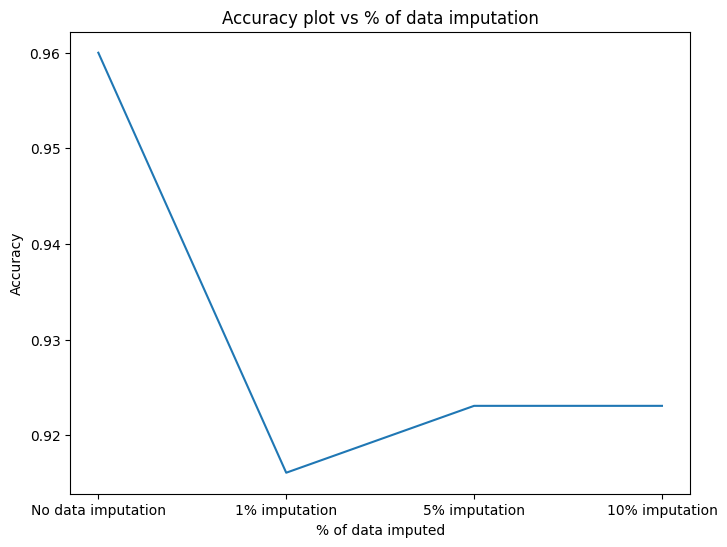

In [104]:
model_firssthand_accuracy = 0.96
np.random.seed(0)
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

## Observations

After doing median and mode imputation of missing values, here also we see that the accuracy keeps decreasing from 1% and then increases after more data imputation.

Our dataset orginally has minimal rows and drop in accuracy meaning we are loosing out on a lot of valuable information

### Imputation Method 2 : Impute using KNN imputer

In [108]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# For 1% imputed data
predictors = predict_impute_1.drop('diagnosis', axis=1)
all_col = list(predictors.columns)
final = imputer.fit_transform(predictors)
imputed_df_1 = pd.DataFrame(final, columns=all_col)
imputed_df_1['diagnosis'] = predict_impute_1['diagnosis'].values  # appending the target column back

# For 5% imputed data
predictors = predict_impute_5.drop('diagnosis', axis=1)
all_col = list(predictors.columns)
final = imputer.fit_transform(predictors)
imputed_df_5 = pd.DataFrame(final, columns=all_col)
imputed_df_5['diagnosis'] = predict_impute_5['diagnosis'].values  # appending the target column back

# For 10% imputed data
predictors = predict_impute_10.drop('diagnosis', axis=1)
all_col = list(predictors.columns)
final = imputer.fit_transform(predictors)
imputed_df_10 = pd.DataFrame(final, columns=all_col)
imputed_df_10['diagnosis'] = predict_impute_10['diagnosis'].values  # appending the target column back


In [109]:
from sklearn import tree
from sklearn.model_selection import train_test_split

model_1 = tree.DecisionTreeClassifier(random_state=42, max_depth=2)

# For 1% imputed data
predictors = predict_impute_1.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_1['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_1_te, auc_1_te, log_loss_1_te, cm_1_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 5% imputed data
predictors = predict_impute_5.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_5['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_2_te, auc_2_te, log_loss_2_te, cm_2_te = performnce_calcuation(y_test, model_1.predict(X_test))

# For 10% imputed data
predictors = predict_impute_10.drop('diagnosis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, predict_impute_10['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train, y_train)
accuracy_3_te, auc_3_te, log_loss_3_te, cm_3_te = performnce_calcuation(y_test, model_1.predict(X_test))


In [110]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.93
Log Loss: 2.77
Confusion Matrix:
 [[81  8]
 [ 3 51]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.93
Log Loss: 2.77
Confusion Matrix:
 [[81  8]
 [ 3 51]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.92
AUC: 0.93
Log Loss: 2.77
Confusion Matrix:
 [[81  8]
 [ 3 51]]

-------------------------------


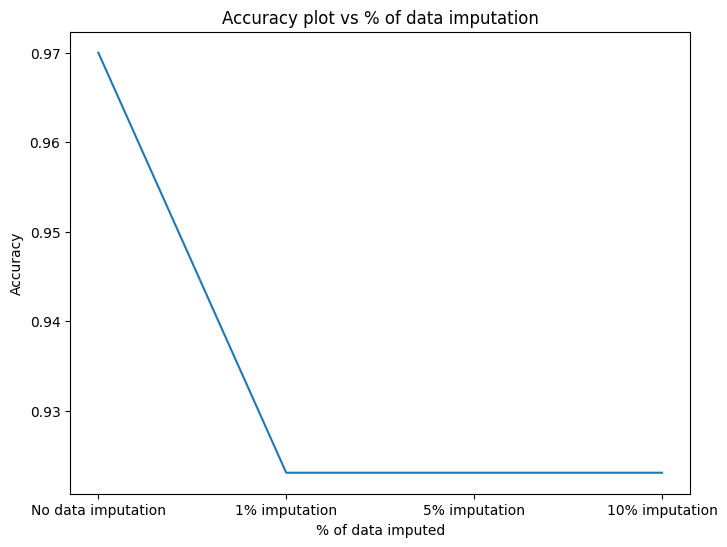

In [111]:
model_firssthand_accuracy = 0.97
np.random.seed(0)
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

This code is generating a plot of accuracy versus the percentage of data imputation using the plt.plot() function from the matplotlib library. The plot is created using the accuracy variable, which is a list containing the accuracy for no data imputation and different levels of data imputation (1%, 5%, 10%). The label variable is a list of strings that are used as the x-axis labels.

## Observations

With this technique, we first observe that accuracy is drops till 1% data imputation Accuracy is constant from 5% to 10 % imputation
The accuracy for all the imputation techniques is less than the base model's accuracy

## Imputation Method 3 : MICE Imputation technique

In [116]:
!pip install fancyimpute
#from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer as MICE
import pandas as pd


# create a copy of the original dataframe with missing values
df_missing = predictors
df_missing.iloc[2:5,3:6] = np.nan

# create an imputer object
imputer = MICE()

# fit the imputer on the data
imputer.fit(predictors)

#MICE().fit_transform(df)


# perform the imputation
df_imputed = imputer.transform(predictors)

predictors=predict_impute_1.drop('diagnosis',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_1=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_5.drop('diagnosis',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_5=pd.DataFrame(final,columns=all_col)

predictors=predict_impute_10.drop('diagnosis',axis=1)
all_col=list(predictors.columns)
final=imputer.fit_transform(predictors)
imputed_df_10=pd.DataFrame(final,columns=all_col)


In [117]:
model_1=tree.DecisionTreeClassifier(random_state=42,max_depth=4)

predictors=df_1_percent_without_nan.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_1_percent_without_nan['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_1_te,auc_1_te,log_loss_1_te,cm_1_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_5_percent_without_nan.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_5_percent_without_nan['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_2_te,auc_2_te,log_loss_2_te,cm_2_te=performnce_calcuation(y_test,model_1.predict(X_test))

predictors=df_10_percent_without_nan.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_10_percent_without_nan['diagnosis'], test_size=0.25, random_state=42)
model_1.fit(X_train,y_train)

accuracy_3_te,auc_3_te,log_loss_3_te,cm_3_te=performnce_calcuation(y_test,model_1.predict(X_test))

In [118]:
print("-------------------------------")
print(f'For 1% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_1_te:.2f}')
print(f'AUC: {auc_1_te:.2f}')
print(f'Log Loss: {log_loss_1_te:.2f}')
print(f'Confusion Matrix:\n {cm_1_te}')
print("\n-------------------------------")
print(f'For 5% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_2_te:.2f}')
print(f'AUC: {auc_2_te:.2f}')
print(f'Log Loss: {log_loss_2_te:.2f}')
print(f'Confusion Matrix:\n {cm_2_te}')
print("\n-------------------------------")
print(f'For 10% Imputation Dataset')
print("-------------------------------")
print(f'Accuracy: {accuracy_3_te:.2f}')
print(f'AUC: {auc_3_te:.2f}')
print(f'Log Loss: {log_loss_3_te:.2f}')
print(f'Confusion Matrix:\n {cm_3_te}')
print("\n-------------------------------")

-------------------------------
For 1% Imputation Dataset
-------------------------------
Accuracy: 0.94
AUC: 0.94
Log Loss: 2.05
Confusion Matrix:
 [[77  2]
 [ 6 56]]

-------------------------------
For 5% Imputation Dataset
-------------------------------
Accuracy: 0.96
AUC: 0.95
Log Loss: 1.59
Confusion Matrix:
 [[78  1]
 [ 5 52]]

-------------------------------
For 10% Imputation Dataset
-------------------------------
Accuracy: 0.93
AUC: 0.93
Log Loss: 2.51
Confusion Matrix:
 [[76  5]
 [ 4 44]]

-------------------------------


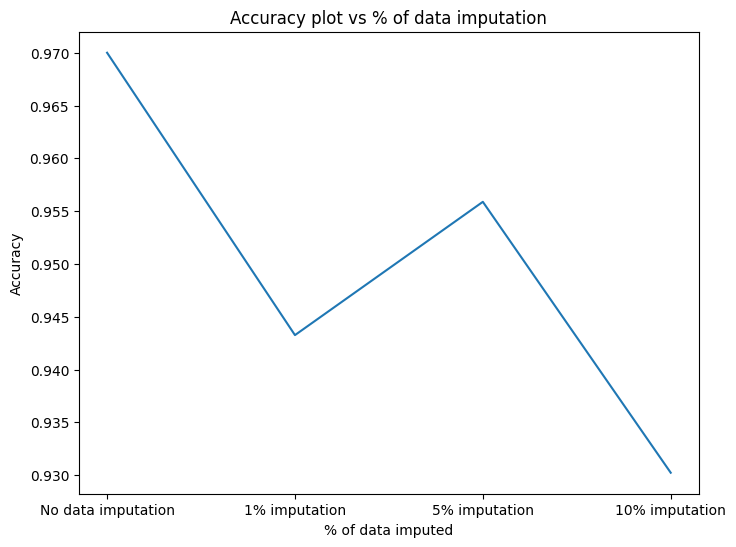

In [119]:
np.random.seed(0)
model_firssthand_accuracy = 0.97
plt.figure(figsize=(8, 6))
accuracy=[model_firssthand_accuracy,accuracy_1_te,accuracy_2_te,accuracy_3_te]
log_loss=[log_loss_1_te,log_loss_2_te,log_loss_3_te]
label=['No data imputation','1% imputation','5% imputation','10% imputation']
plt.title('Accuracy plot vs % of data imputation')
plt.ylabel('Accuracy')
plt.xlabel('% of data imputed')
plt.plot(label,accuracy)

Observations:
With this technique, we first observe a decrease in accuracy after 1% data imputation there is a significant increase in accuracy after 5% data imputation the accuracy for all the imputation techniques is less than the base model's accuracy

**Note:** The imputation graphs may change every time you run the code due to the randomness involved in the imputation methods.

## **Citations**

1.Many techniques used in this notebook have been inspired from the following github repositories

Owner - AI Skunkworks Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models and code corrections have been adapted from stackoverflow Link - https://stackoverflow.com

3.References have been taken from the seaborn webpage for charts and visualization Link - https://seaborn.pydata.org

4.Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

5.MICE Imputation Technique https://stackoverflow.com/questions/54059964/can-not-use-mice-from-fancyimputer-python

6.How to Identify the Most Important Predictor Variables in Regression Models https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa



# Licensing

### Copyright 2023 Payal Nagaonkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

